In [1]:
import os
import sys
import socket
import pickle
import importlib
import itertools
import functools
import collections
import logging
logging.basicConfig(level=logging.INFO)

import tqdm

import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import xgboost as xgb

from statsmodels.stats.multitest import multipletests

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, train_test_split, KFold, GridSearchCV

SRC_DIR = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'rnagps')
assert os.path.isdir(SRC_DIR)
sys.path.append(SRC_DIR)
import data_loader
import model_utils
import plotting_utils
import utils
import seq

PLOT_DIR = os.path.join(os.path.dirname(SRC_DIR), "plots")
assert os.path.isdir(PLOT_DIR)

np.random.seed(27492)
SEED = 27492

print('The scikit-learn version is {}.'.format(sklearn.__version__))

INFO:root:CPU


The scikit-learn version is 0.21.3.


In [2]:
all_cv_folds = data_loader.load_dataset_all_folds(
    data_loader.LocalizationClassificationKmers,
    {},
)

INFO:root:Read deseq table containing results for localizations: Erm Kdel Lma Mito Nes Nik Nls NucPore Omm
INFO:root:Read deseq table containing results for localizations: Erm Kdel Lma Mito Nes Nik Nls NucPore Omm
INFO:root:Retaining data only for Erm Lma Mito Nes Nik Nls NucPore Omm
INFO:root:Retaining data only for Erm Lma Mito Nes Nik Nls NucPore Omm
INFO:root:Read deseq table containing results for localizations: Erm Kdel Lma Mito Nes Nik Nls NucPore Omm
INFO:root:Read deseq table containing results for localizations: Erm Kdel Lma Mito Nes Nik Nls NucPore Omm
INFO:root:Retaining data only for Erm Lma Mito Nes Nik Nls NucPore Omm
INFO:root:Retaining data only for Erm Lma Mito Nes Nik Nls NucPore Omm
INFO:root:Read deseq table containing results for localizations: Erm Kdel Lma Mito Nes Nik Nls NucPore Omm
INFO:root:Retaining data only for Erm Lma Mito Nes Nik Nls NucPore Omm
INFO:root:Read deseq table containing results for localizations: Erm Kdel Lma Mito Nes Nik Nls NucPore Omm
INF

INFO:root:13	0.004439890710382513	Mt_tRNA
INFO:root:10	0.0034153005464480873	unprocessed_pseudogene
INFO:root:9	0.0030737704918032786	transcribed_processed_pseudogene
INFO:root:8	0.00273224043715847	misc_RNA
INFO:root:7	0.0023907103825136613	sense_overlapping
INFO:root:7	0.0023907103825136613	sense_intronic
INFO:root:6	0.0020491803278688526	rRNA
INFO:root:2	0.0006830601092896175	miRNA
INFO:root:2	0.0006830601092896175	transcribed_unitary_pseudogene
INFO:root:1	0.00034153005464480874	macro_lncRNA
INFO:root:1	0.00034153005464480874	snoRNA
INFO:root:1	0.00034153005464480874	translated_processed_pseudogene
INFO:root:1	0.00034153005464480874	3prime_overlapping_ncRNA
INFO:root:1	0.00034153005464480874	Mt_rRNA
INFO:root:1	0.00034153005464480874	polymorphic_pseudogene
INFO:root:1	0.00034153005464480874	IG_V_pseudogene
INFO:root:1	0.00034153005464480874	pseudogene
INFO:root:Read deseq table containing results for localizations: Erm Kdel Lma Mito Nes Nik Nls NucPore Omm
INFO:root:Retaining data 

INFO:root:24	0.00819672131147541	processed_transcript
INFO:root:14	0.0047814207650273225	Mt_tRNA
INFO:root:11	0.003756830601092896	unprocessed_pseudogene
INFO:root:9	0.0030737704918032786	sense_overlapping
INFO:root:8	0.00273224043715847	transcribed_processed_pseudogene
INFO:root:7	0.0023907103825136613	rRNA
INFO:root:7	0.0023907103825136613	misc_RNA
INFO:root:6	0.0020491803278688526	sense_intronic
INFO:root:2	0.0006830601092896175	Mt_rRNA
INFO:root:2	0.0006830601092896175	transcribed_unitary_pseudogene
INFO:root:1	0.00034153005464480874	snRNA
INFO:root:1	0.00034153005464480874	snoRNA
INFO:root:1	0.00034153005464480874	translated_processed_pseudogene
INFO:root:1	0.00034153005464480874	miRNA
INFO:root:1	0.00034153005464480874	3prime_overlapping_ncRNA
INFO:root:1	0.00034153005464480874	polymorphic_pseudogene
INFO:root:1	0.00034153005464480874	IG_V_pseudogene
INFO:root:1	0.00034153005464480874	pseudogene
INFO:root:Read deseq table containing results for localizations: Erm Kdel Lma Mito Ne

INFO:root:Nes - 22/366 = 0.060109289617486336 positive
INFO:root:Nik - 146/366 = 0.3989071038251366 positive
INFO:root:Nls - 88/366 = 0.24043715846994534 positive
INFO:root:NucPore - 19/366 = 0.05191256830601093 positive
INFO:root:Omm - 58/366 = 0.15846994535519127 positive
INFO:root:324	0.8852459016393442	protein_coding
INFO:root:12	0.03278688524590164	lincRNA
INFO:root:9	0.02459016393442623	antisense_RNA
INFO:root:6	0.01639344262295082	transcribed_unprocessed_pseudogene
INFO:root:6	0.01639344262295082	processed_pseudogene
INFO:root:5	0.01366120218579235	processed_transcript
INFO:root:2	0.00546448087431694	sense_overlapping
INFO:root:1	0.00273224043715847	unprocessed_pseudogene
INFO:root:1	0.00273224043715847	rRNA
INFO:root:Read deseq table containing results for localizations: Erm Kdel Lma Mito Nes Nik Nls NucPore Omm
INFO:root:Retaining data only for Erm Lma Mito Nes Nik Nls NucPore Omm
INFO:root:Retaining 3660/20852 genes as significant
INFO:root:Erm - 115/366 = 0.31420765027322406

INFO:root:11	0.030054644808743168	lincRNA
INFO:root:5	0.01366120218579235	transcribed_unprocessed_pseudogene
INFO:root:4	0.01092896174863388	processed_transcript
INFO:root:4	0.01092896174863388	antisense_RNA
INFO:root:4	0.01092896174863388	processed_pseudogene
INFO:root:2	0.00546448087431694	unprocessed_pseudogene
INFO:root:2	0.00546448087431694	rRNA
INFO:root:2	0.00546448087431694	sense_intronic
INFO:root:1	0.00273224043715847	translated_processed_pseudogene
INFO:root:1	0.00273224043715847	misc_RNA
INFO:root:1	0.00273224043715847	sense_overlapping
INFO:root:1	0.00273224043715847	Mt_tRNA
INFO:root:Retaining 3660/20852 genes as significant
INFO:root:Read deseq table containing results for localizations: Erm Kdel Lma Mito Nes Nik Nls NucPore Omm
INFO:root:Retaining data only for Erm Lma Mito Nes Nik Nls NucPore Omm
INFO:root:Erm - 125/366 = 0.34153005464480873 positive
INFO:root:Lma - 86/366 = 0.23497267759562843 positive
INFO:root:Mito - 28/366 = 0.07650273224043716 positive
INFO:root:N

INFO:root:15	0.040983606557377046	antisense_RNA
INFO:root:5	0.01366120218579235	processed_pseudogene
INFO:root:4	0.01092896174863388	lincRNA
INFO:root:4	0.01092896174863388	processed_transcript
INFO:root:2	0.00546448087431694	transcribed_processed_pseudogene
INFO:root:2	0.00546448087431694	transcribed_unprocessed_pseudogene
INFO:root:2	0.00546448087431694	Mt_tRNA
INFO:root:2	0.00546448087431694	sense_overlapping
INFO:root:2	0.00546448087431694	misc_RNA
INFO:root:1	0.00273224043715847	pseudogene
INFO:root:1	0.00273224043715847	unprocessed_pseudogene
INFO:root:1	0.00273224043715847	sense_intronic
INFO:root:322	0.8797814207650273	protein_coding
INFO:root:13	0.03551912568306011	antisense_RNA
INFO:root:6	0.01639344262295082	lincRNA
INFO:root:6	0.01639344262295082	processed_pseudogene
INFO:root:5	0.01366120218579235	transcribed_unprocessed_pseudogene
INFO:root:4	0.01092896174863388	Mt_tRNA
INFO:root:3	0.00819672131147541	processed_transcript
INFO:root:2	0.00546448087431694	transcribed_proces

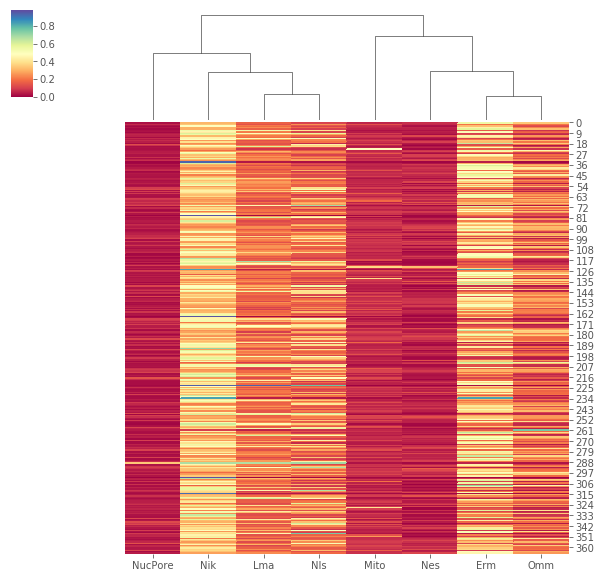

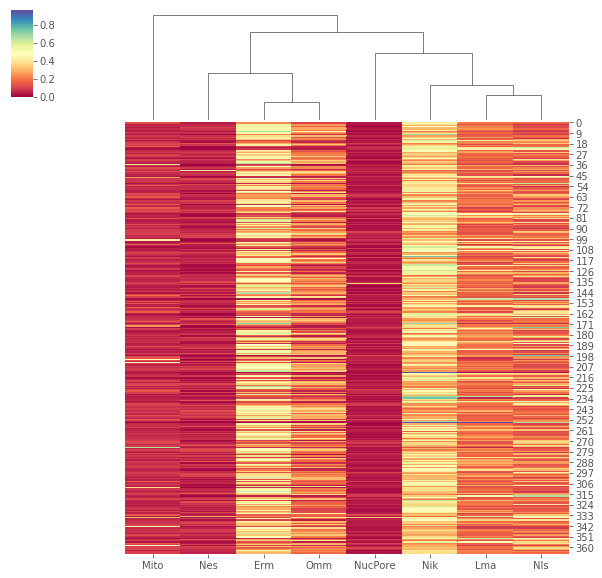

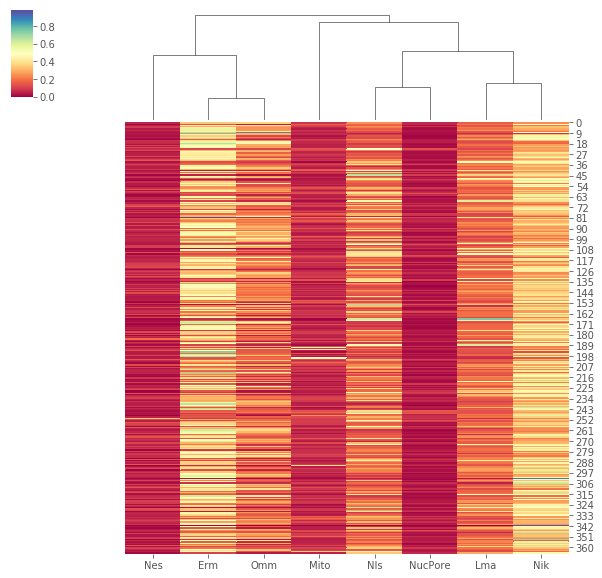

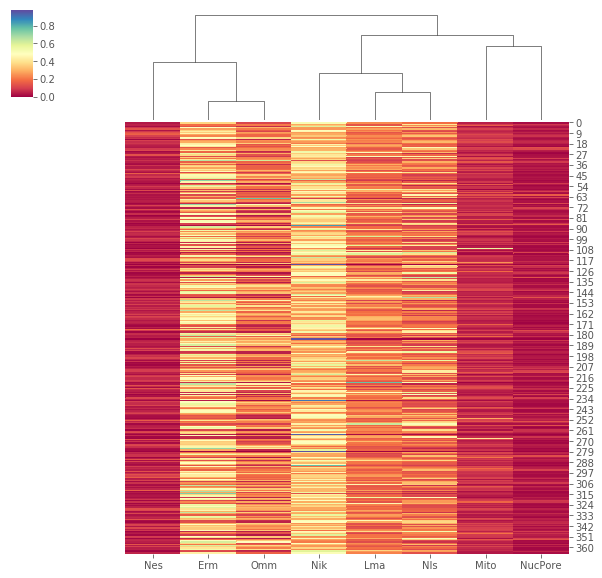

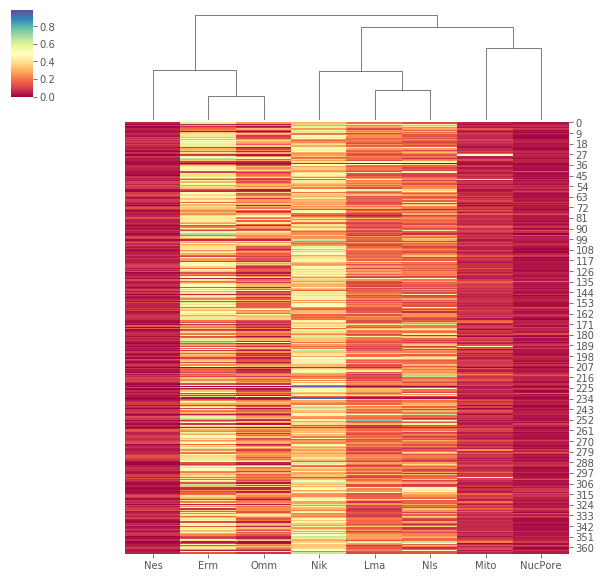

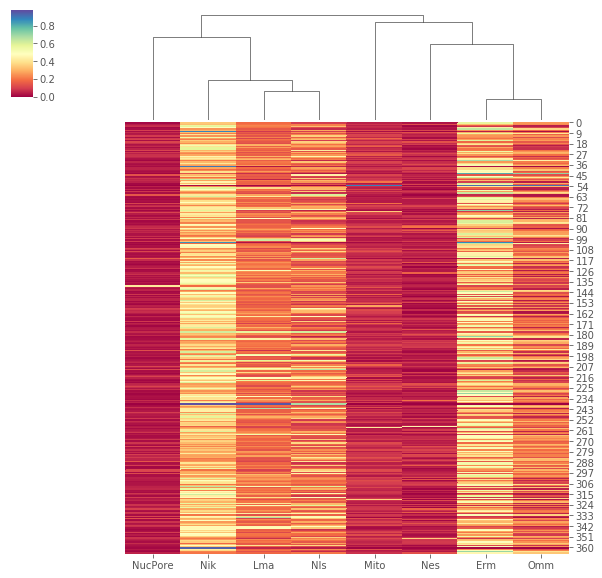

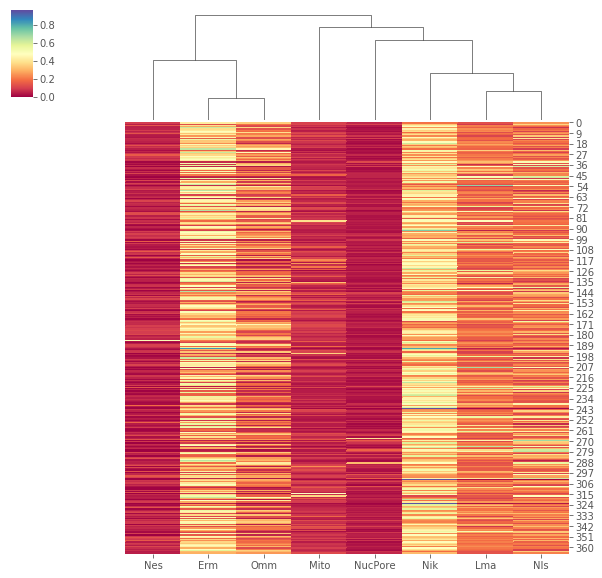

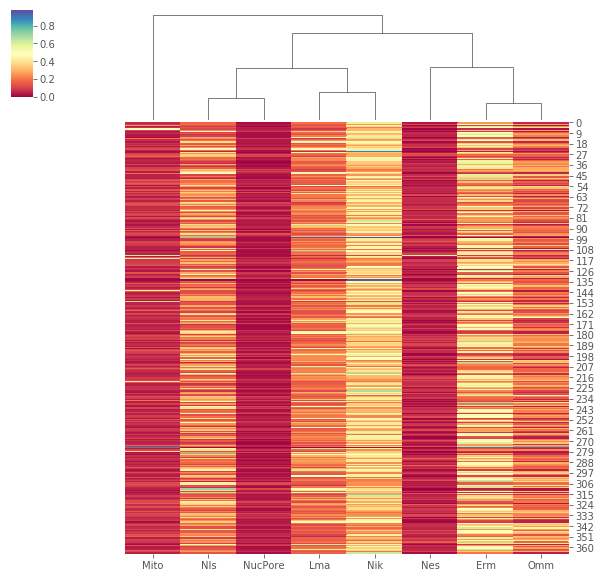

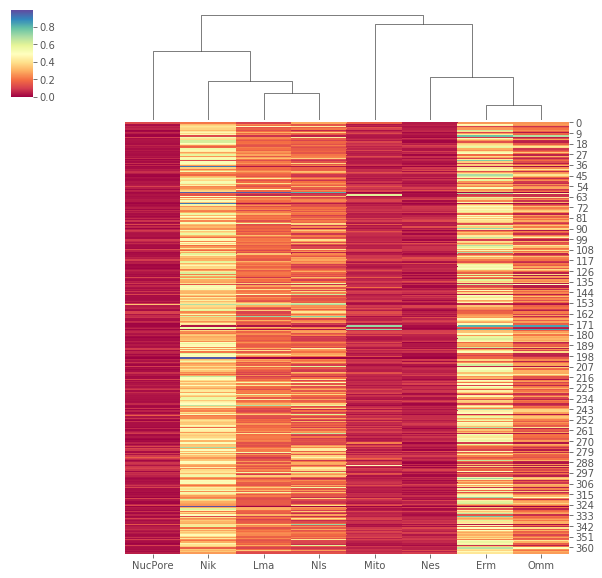

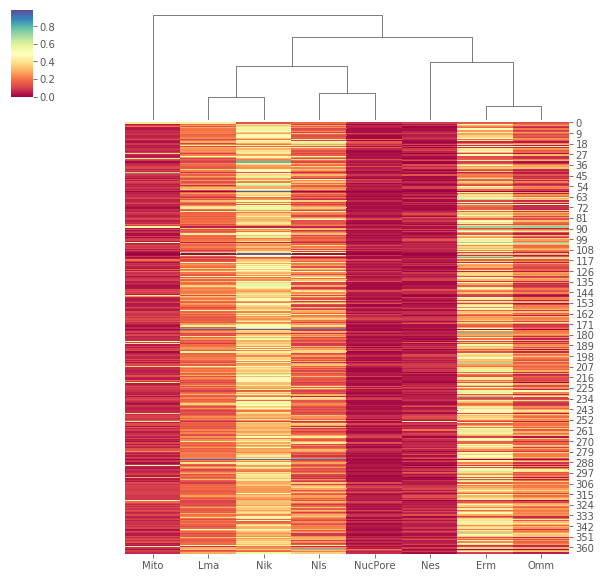

In [3]:
importlib.reload(model_utils)

rf_kwarg_combos = {
    "n_estimators": [100, 150, 200, 250, 300],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 25, 50, 100],
    "min_samples_leaf": [0.001, 0.01, 0.1],
    "max_features": ['sqrt'],
    "class_weight": [None],  # ['balanced', None],
    "n_jobs": [48],
    "random_state": [39282],  # For reproducibility
}

cv_overall_perf, cv_class_perf, cv_clustering = model_utils.cross_validate(
    RandomForestClassifier,
    all_cv_folds,
    model_kwargs=rf_kwarg_combos,
)

In [4]:
def mean_confidence_interval(data, confidence=0.95):
    # https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

### AUROCs

In [5]:
fold_aurocs = np.array([p.auroc for p in cv_overall_perf])
fold_aurocs

array([0.77060024, 0.77335515, 0.76646703, 0.7332267 , 0.72889442,
       0.7678688 , 0.75466271, 0.72765893, 0.75186754, 0.761946  ])

In [6]:
np.mean(fold_aurocs), np.median(fold_aurocs), np.std(fold_aurocs), np.min(fold_aurocs), np.max(fold_aurocs)

(0.7536547546835599,
 0.7583043595711629,
 0.016794539587934244,
 0.727658933675102,
 0.7733551507326646)

In [7]:
cv_class_aurocs = []
for i in range(data_loader.K_FOLDS):
    cv_class_aurocs.append(np.atleast_2d(np.array([p.auroc for p in cv_class_perf[i]])).T)
cv_class_aurocs = pd.DataFrame(
    np.hstack(cv_class_aurocs)
)
cv_class_aurocs

,0,1,2,3,4,5,6,7,8,9
0,0.775884,0.757750,0.762919,0.785235,0.772595,0.781673,0.770845,0.733879,0.798636,0.787216
1,0.724419,0.737083,0.761693,0.671056,0.677168,0.744951,0.737983,0.724519,0.739268,0.713723
2,0.827874,0.773932,0.713337,0.693214,0.725865,0.708552,0.751867,0.690709,0.751584,0.865683
3,0.823904,0.814769,0.855780,0.835624,0.751084,0.861425,0.736784,0.850329,0.871965,0.785412
4,0.715632,0.729742,0.755154,0.651494,0.690073,0.693970,0.700772,0.731361,0.677335,0.728325
5,0.739707,0.705263,0.792394,0.765043,0.759287,0.755114,0.758076,0.766923,0.748265,0.721806
6,0.774107,0.811462,0.710906,0.727135,0.667684,0.804652,0.817799,0.539888,0.628090,0.695262
7,0.783275,0.856840,0.779554,0.737013,0.787399,0.792614,0.763176,0.783663,0.799796,0.798140


### AUPRCs

In [8]:
fold_auprcs = np.array([p.auprc for p in cv_overall_perf])
fold_auprcs

array([0.4857574 , 0.47368112, 0.43915916, 0.40845274, 0.38995755,
       0.49441422, 0.47030283, 0.43618397, 0.44448713, 0.44993413])

In [9]:
np.mean(fold_auprcs), np.median(fold_auprcs), np.std(fold_auprcs), np.min(fold_auprcs), np.max(fold_auprcs)

(0.4492330252533872,
 0.44721062825667796,
 0.031445835093658274,
 0.3899575537090036,
 0.49441421899593996)

In [10]:
mean_confidence_interval(fold_auprcs)

(0.4492330252533872, 0.42552121822155686, 0.47294483228521755)

In [11]:
cv_class_auprcs = []
for i in range(data_loader.K_FOLDS):
    cv_class_auprcs.append(np.atleast_2d(np.array([p.auprc for p in cv_class_perf[i]])).T)
cv_class_auprcs = pd.DataFrame(
    np.hstack(cv_class_auprcs)
)
cv_class_auprcs

,0,1,2,3,4,5,6,7,8,9
0,0.647076,0.619858,0.672410,0.682322,0.619552,0.677582,0.620466,0.491272,0.691709,0.626548
1,0.577787,0.509785,0.414692,0.349010,0.397386,0.476709,0.398551,0.476648,0.563281,0.461103
2,0.420268,0.453617,0.340570,0.301443,0.304841,0.331245,0.387544,0.396654,0.324885,0.630256
3,0.305794,0.291028,0.335705,0.223621,0.125625,0.487778,0.397090,0.287484,0.296302,0.234746
4,0.605545,0.600329,0.618193,0.605658,0.555656,0.598912,0.644315,0.652004,0.541908,0.630381
5,0.564412,0.409806,0.521300,0.581523,0.495745,0.549159,0.509225,0.553210,0.511111,0.434813
6,0.228380,0.354688,0.106460,0.155670,0.083027,0.316291,0.324920,0.084550,0.137999,0.055390
7,0.536797,0.550336,0.503944,0.368375,0.537828,0.517637,0.480312,0.547651,0.488704,0.526236


# Boosted trees

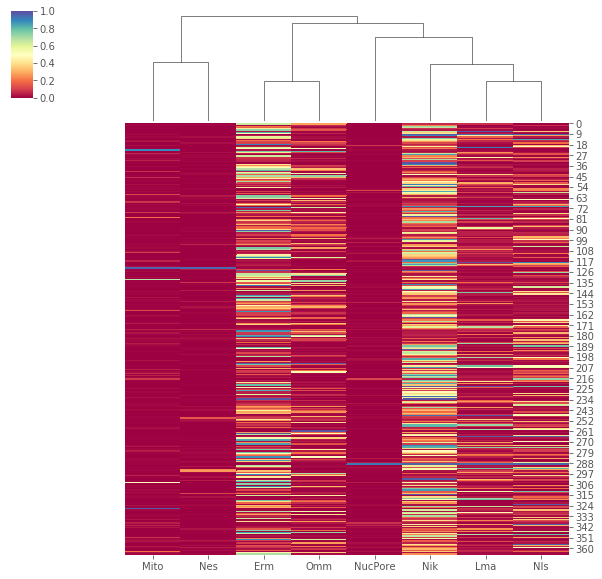

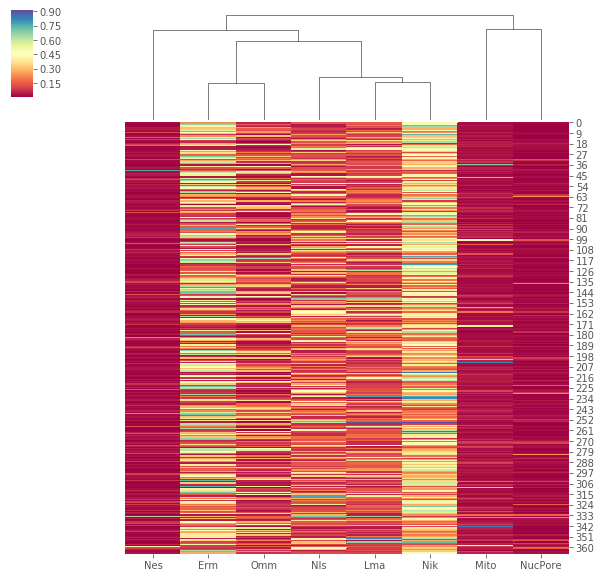

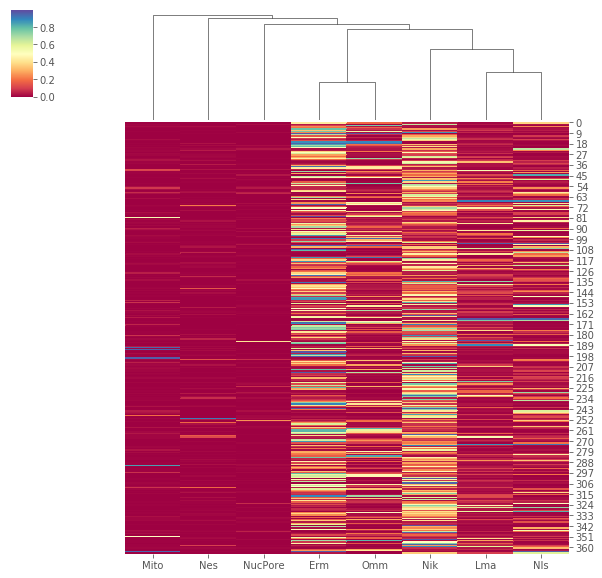

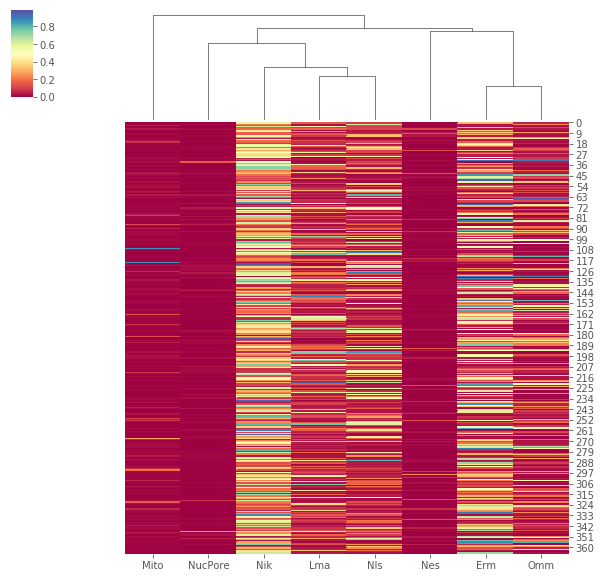

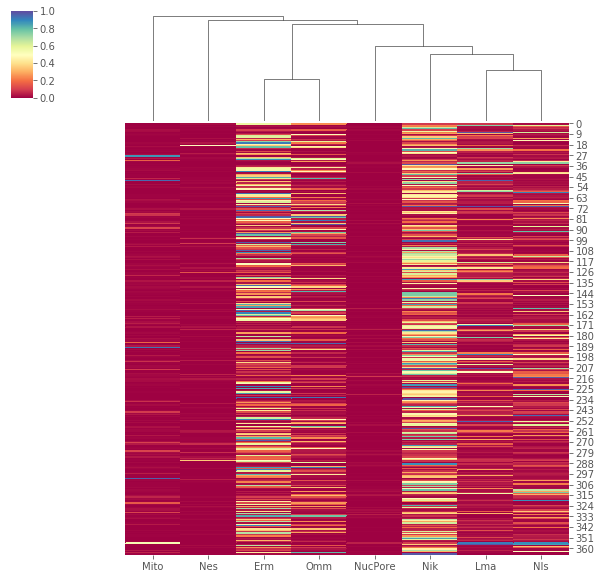

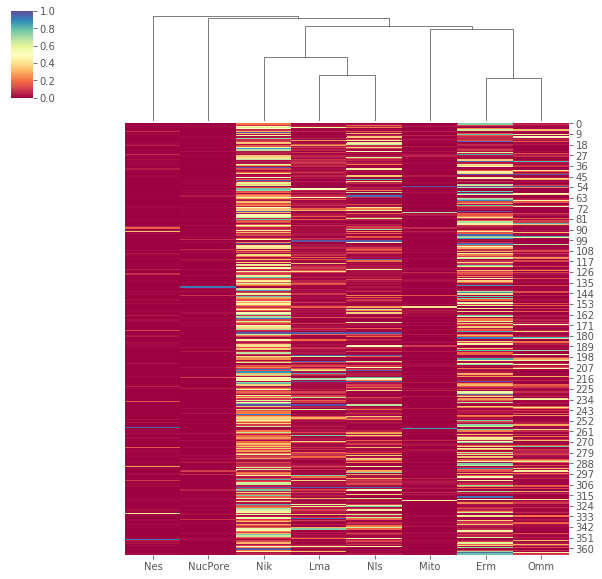

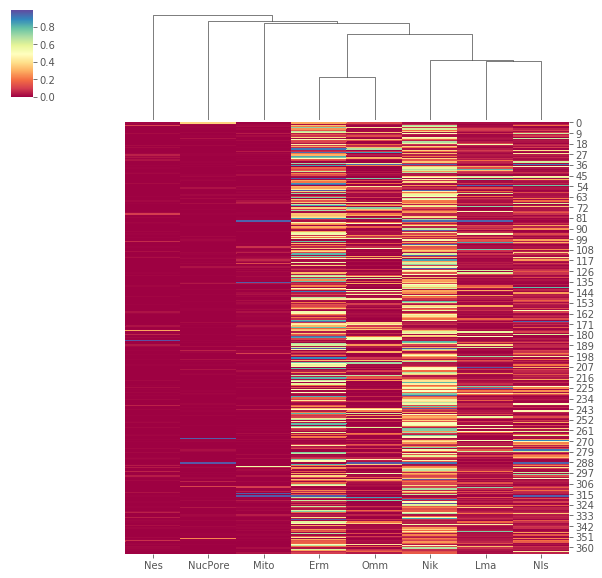

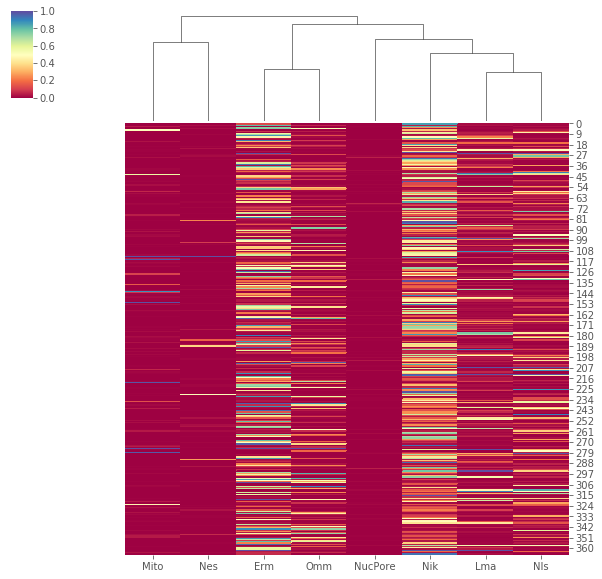

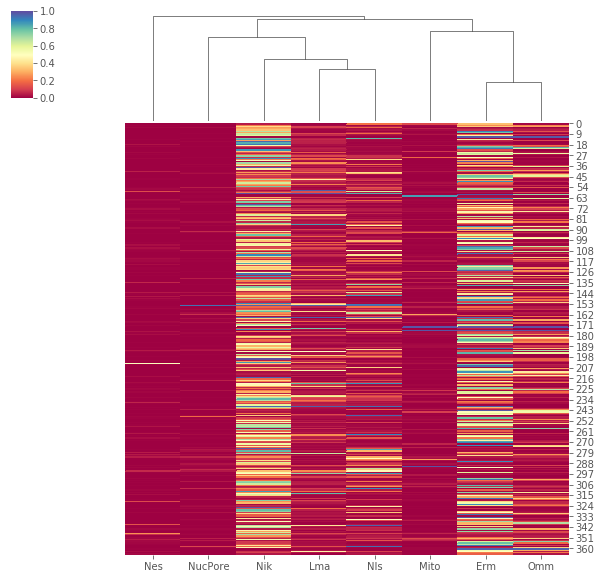

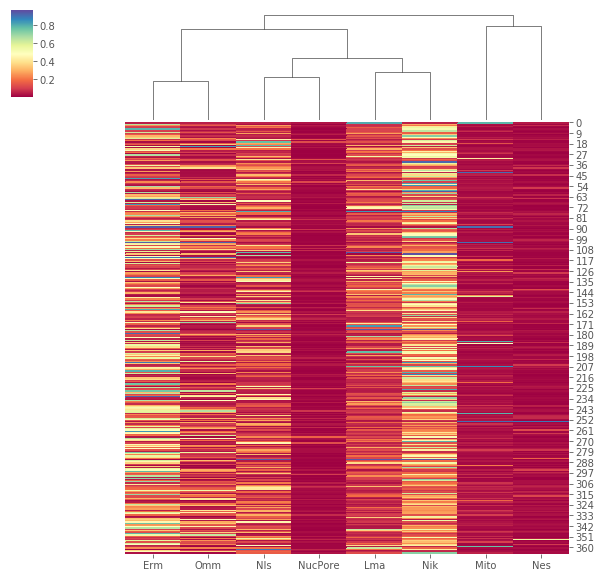

In [12]:
importlib.reload(model_utils)

import xgboost as xgb

xgb_max_depths = [4, 6, 8]  # [3, 4, 6]
xgb_learning_rate = [0.1, 0.02]
xgb_n_estimators = [100, 200]
xgb_boosters = ['gbtree', 'gblinear', 'dart']  # Only gbtree is interpretable by shap
xgb_gamma = [0.01]  # [0, 0.01]
xgb_reg_alpha = [0, 1]

bt_kwarg_combos = {
    "max_depth": xgb_max_depths,
    "learning_rate": xgb_learning_rate,
    "n_estimators": xgb_n_estimators,
    "booster": xgb_boosters,
    "gamma": xgb_gamma,
    "reg_alpha": xgb_reg_alpha,
    "n_jobs": [8],
    "random_state": [2911],
    "reg_lambda": [0],
}

xgb_cv_overall_perf, xgb_cv_class_perf, xgb_cv_clustering = model_utils.cross_validate(
    lambda **param_dict: OneVsRestClassifier(xgb.XGBClassifier(**param_dict), n_jobs=8),
    all_cv_folds,
    model_kwargs=bt_kwarg_combos,
)

In [13]:
xgb_fold_aurocs = np.array([p.auroc for p in xgb_cv_overall_perf])
xgb_fold_aurocs

array([0.77049553, 0.75149829, 0.74769066, 0.7196563 , 0.74024755,
       0.76403823, 0.74492669, 0.73050228, 0.76538481, 0.74171971])

In [14]:
np.mean(xgb_fold_aurocs), np.median(xgb_fold_aurocs), np.std(xgb_fold_aurocs), np.min(xgb_fold_aurocs), np.max(xgb_fold_aurocs)

(0.7476160055792425,
 0.7463086764455652,
 0.015148888778245563,
 0.719656297120985,
 0.7704955321371831)

In [18]:
scipy.stats.ttest_rel(xgb_fold_aurocs, fold_aurocs)

Ttest_relResult(statistic=-1.4851191359527607, pvalue=0.17167261335507364)

In [15]:
xgb_fold_auprcs = np.array([p.auprc for p in xgb_cv_overall_perf])
xgb_fold_auprcs

array([0.46772873, 0.46857475, 0.44285209, 0.40255572, 0.40122469,
       0.48273778, 0.44521651, 0.43669115, 0.47345444, 0.45168726])

In [16]:
np.mean(xgb_fold_auprcs), np.median(xgb_fold_auprcs), np.std(xgb_fold_auprcs), np.min(xgb_fold_auprcs), np.max(xgb_fold_auprcs)

(0.4472723128902517,
 0.4484518820926832,
 0.02662843675335654,
 0.40122469084456003,
 0.4827377829248375)

In [19]:
scipy.stats.ttest_rel(xgb_fold_auprcs, fold_auprcs)

Ttest_relResult(statistic=-0.4062811832967465, pvalue=0.6940267188299151)

## Plot clustering across all folds

In [22]:
full_dataset = data_loader.LocalizationClassificationKmers("all", kmer_sizes=[3, 4, 5], addtl_negatives=False)
full_data = data_loader.load_data_as_np(full_dataset)

INFO:root:Read deseq table containing results for localizations: Erm Kdel Lma Mito Nes Nik Nls NucPore Omm
INFO:root:Retaining data only for Erm Lma Mito Nes Nik Nls NucPore Omm
INFO:root:Retaining 3660/20852 genes as significant
INFO:root:Erm - 1223/3660 = 0.3341530054644809 positive
INFO:root:Lma - 768/3660 = 0.2098360655737705 positive
INFO:root:Mito - 301/3660 = 0.08224043715846995 positive
INFO:root:Nes - 208/3660 = 0.05683060109289618 positive
INFO:root:Nik - 1371/3660 = 0.37459016393442623 positive
INFO:root:Nls - 823/3660 = 0.22486338797814207 positive
INFO:root:NucPore - 159/3660 = 0.04344262295081967 positive
INFO:root:Omm - 739/3660 = 0.20191256830601093 positive
INFO:root:3245	0.8866120218579235	protein_coding
INFO:root:100	0.0273224043715847	lincRNA
INFO:root:97	0.026502732240437157	antisense_RNA
INFO:root:49	0.013387978142076503	transcribed_unprocessed_pseudogene
INFO:root:49	0.013387978142076503	processed_pseudogene
INFO:root:28	0.007650273224043716	processed_transcript


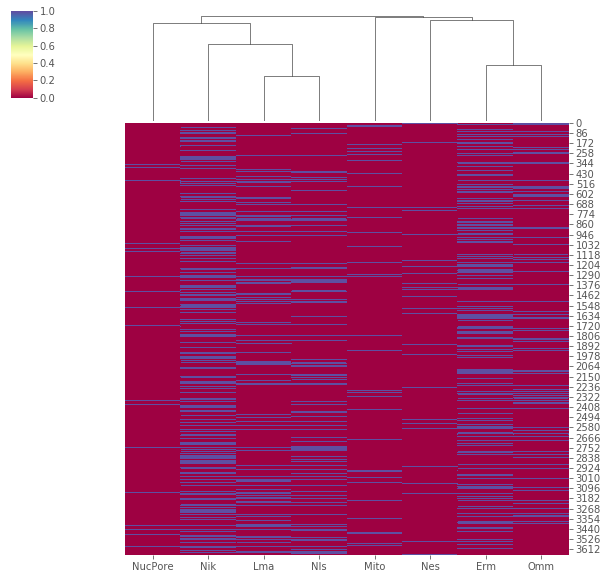

In [24]:
# Compare the above to clustering done on the actual truth labels (validation)
g_full_truths = sns.clustermap(
    pd.DataFrame(full_data[1], columns=full_dataset.compartments),
    row_cluster=False,
    col_cluster=True,
    cmap='Spectral',
    metric='cosine',
)

In [37]:
g_full_truths.dendrogram_col.linkage

array([[ 1.        ,  5.        ,  0.40882327,  2.        ],
       [ 0.        ,  7.        ,  0.50667015,  2.        ],
       [ 4.        ,  8.        ,  0.69793158,  3.        ],
       [ 6.        , 10.        ,  0.87930864,  4.        ],
       [ 3.        ,  9.        ,  0.90906497,  3.        ],
       [ 2.        , 12.        ,  0.93596396,  4.        ],
       [11.        , 13.        ,  0.94250841,  8.        ]])

In [46]:
def extract_clustering(linkage_mat, idx_to_label=None):
    """Convert linkage matrix to a string representation of the tree structure"""
    n = len(linkage_mat) + 1
    # Initialize leaves
    if idx_to_label:
        clusters = {i: idx_to_label[i] for i in range(n)}
    else:
        clusters = {i: str(i) for i in range(n)}
    # Combine according to linkage matrix
    for i, row in enumerate(linkage_mat):
        new_clust = "(" + ','.join([clusters[row[0]], clusters[row[1]]]) + ")"
        clusters[n + i] = new_clust
    return clusters[n + i]

extract_clustering(g_full_truths.dendrogram_col.linkage, full_dataset.compartments)

'((NucPore,(Nik,(Lma,Nls))),(Mito,(Nes,(Erm,Omm))))'

In [49]:
# https://dendropy.org/library/treemodel.html#dendropy.datamodel.treemodel.Tree
import dendropy
# This is important to retain the taxonomic namespace for all subsequent trees
# https://dendropy.org/library/taxonmodel.html#dendropy.datamodel.taxonmodel.TaxonNamespace
t1 = dendropy.Tree.get(
    data=extract_clustering(g_full_truths.dendrogram_col.linkage, full_dataset.compartments) + ";",
    schema='newick',
)
print(t1)

((NucPore,(Nik,(Lma,Nls))),(Mito,(Nes,(Erm,Omm))))


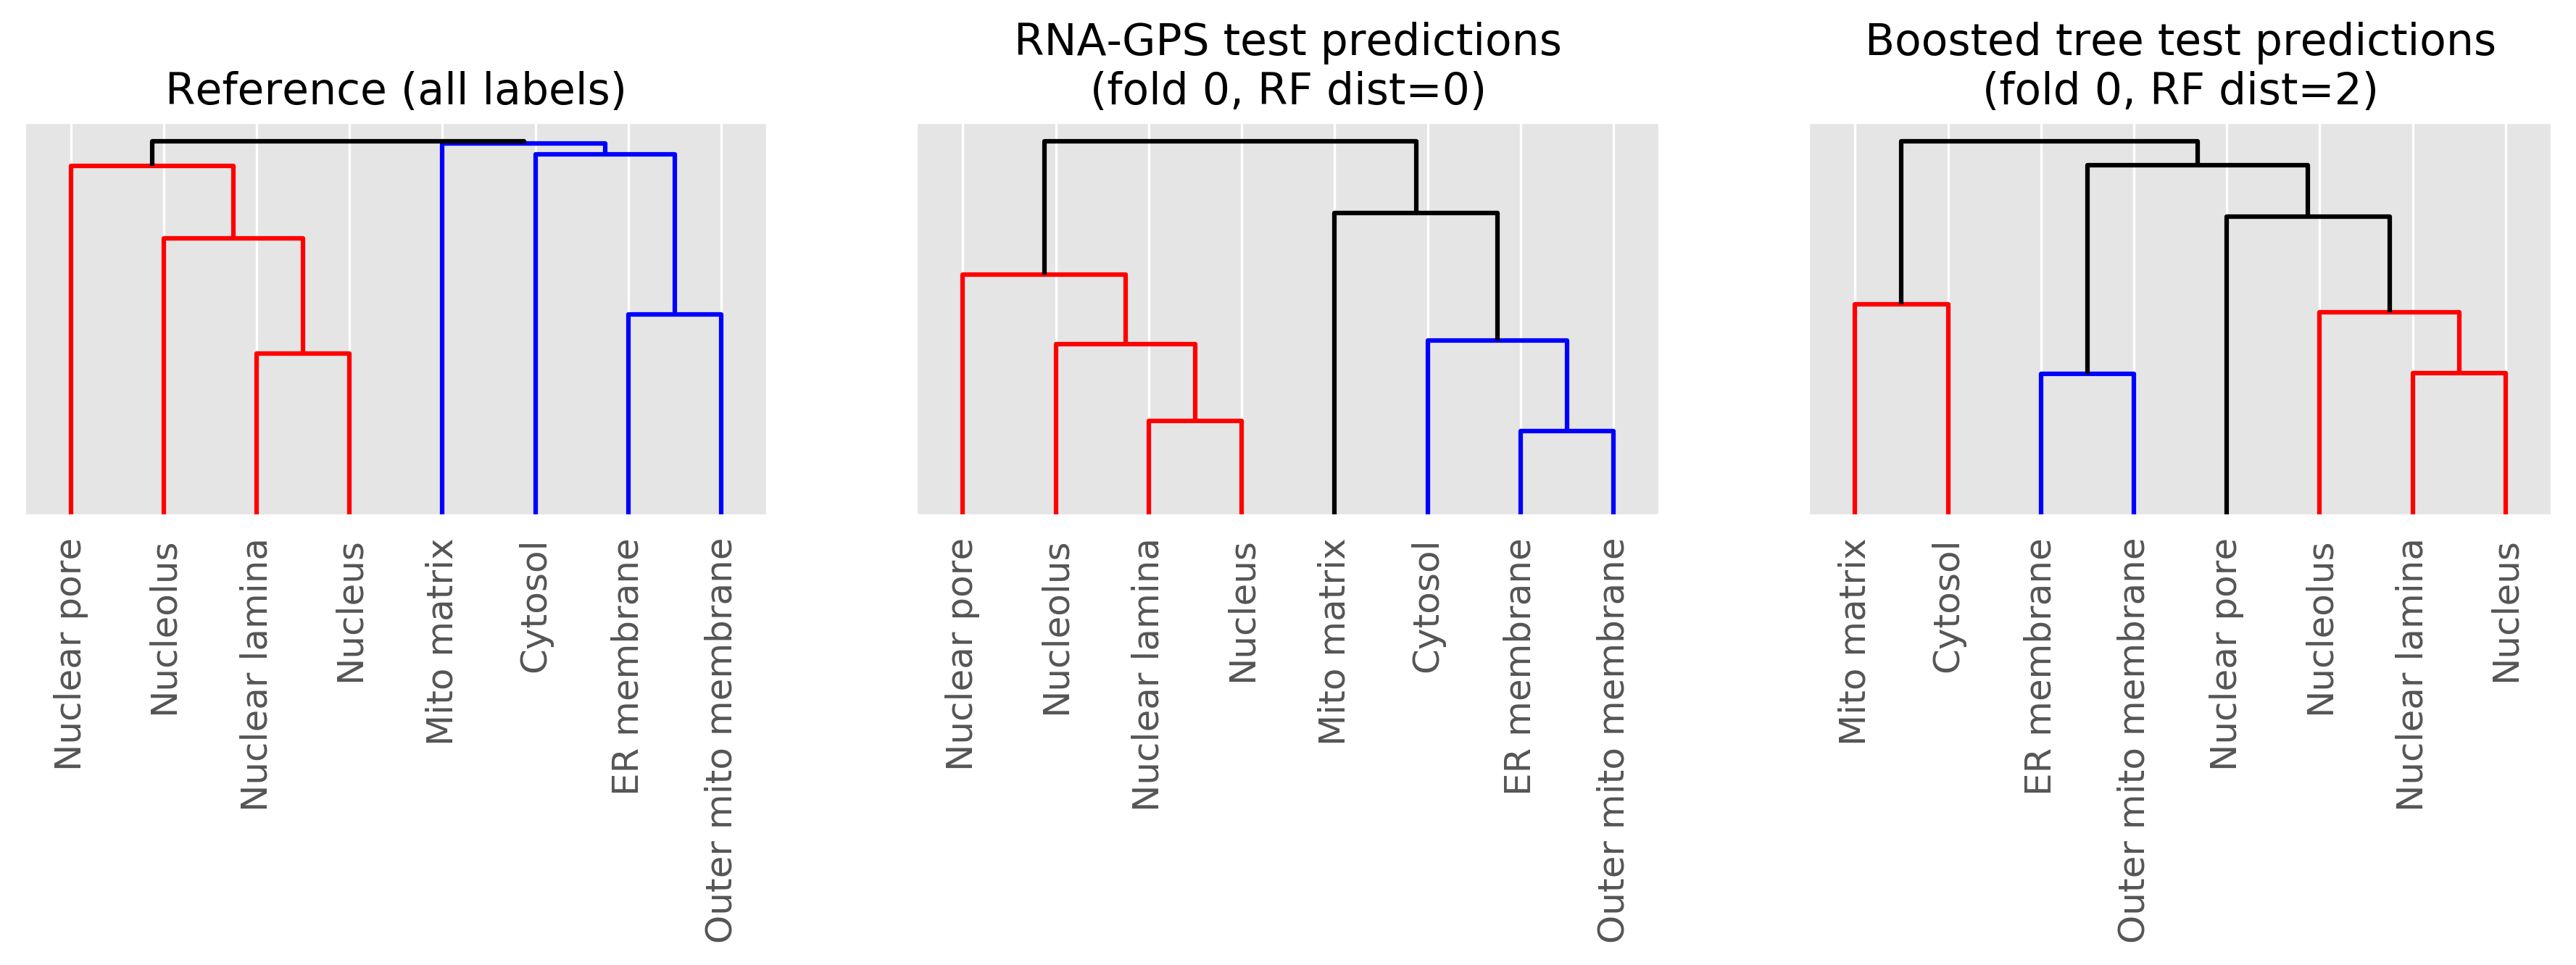

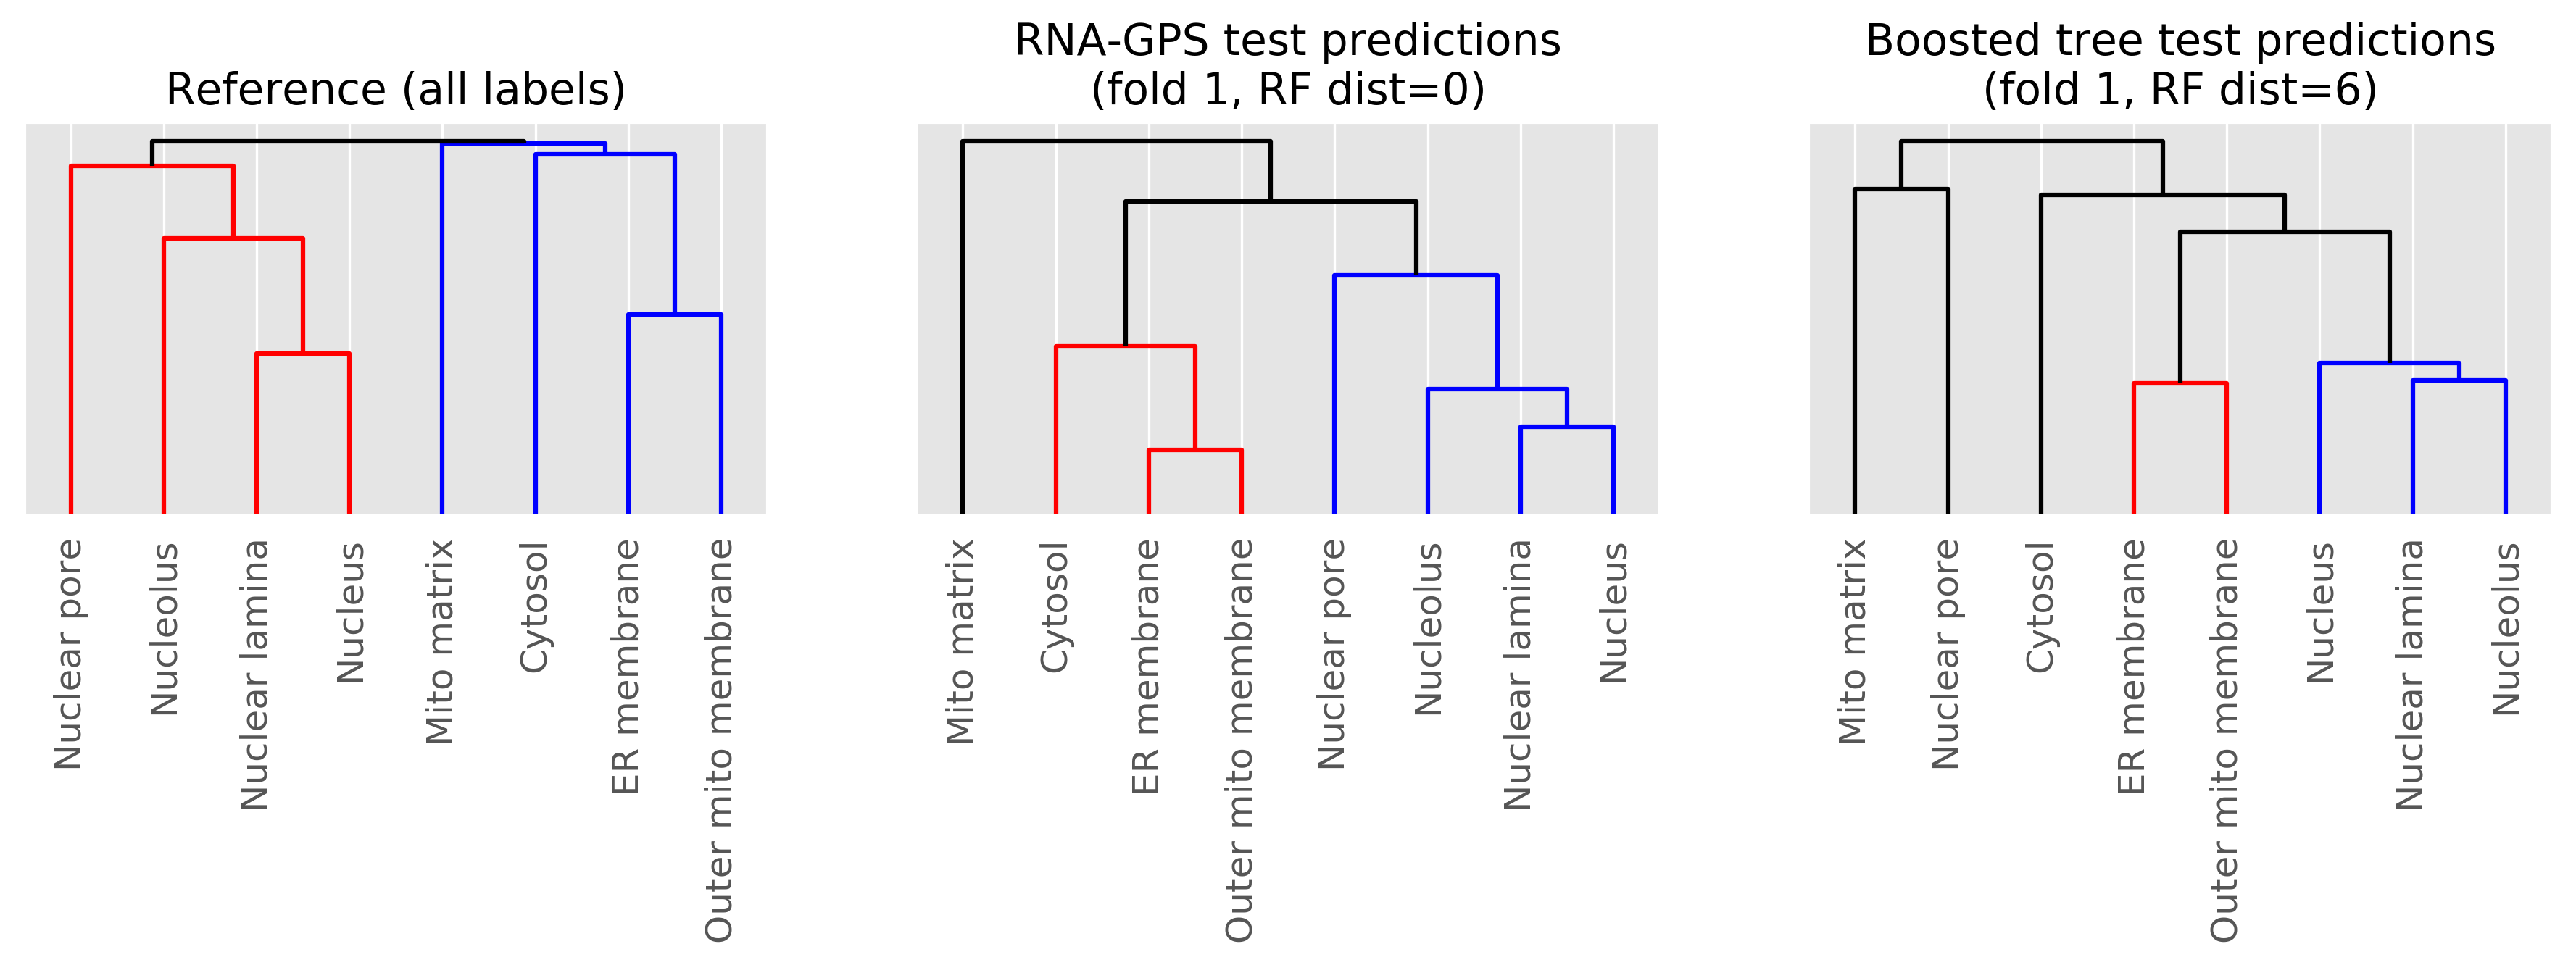

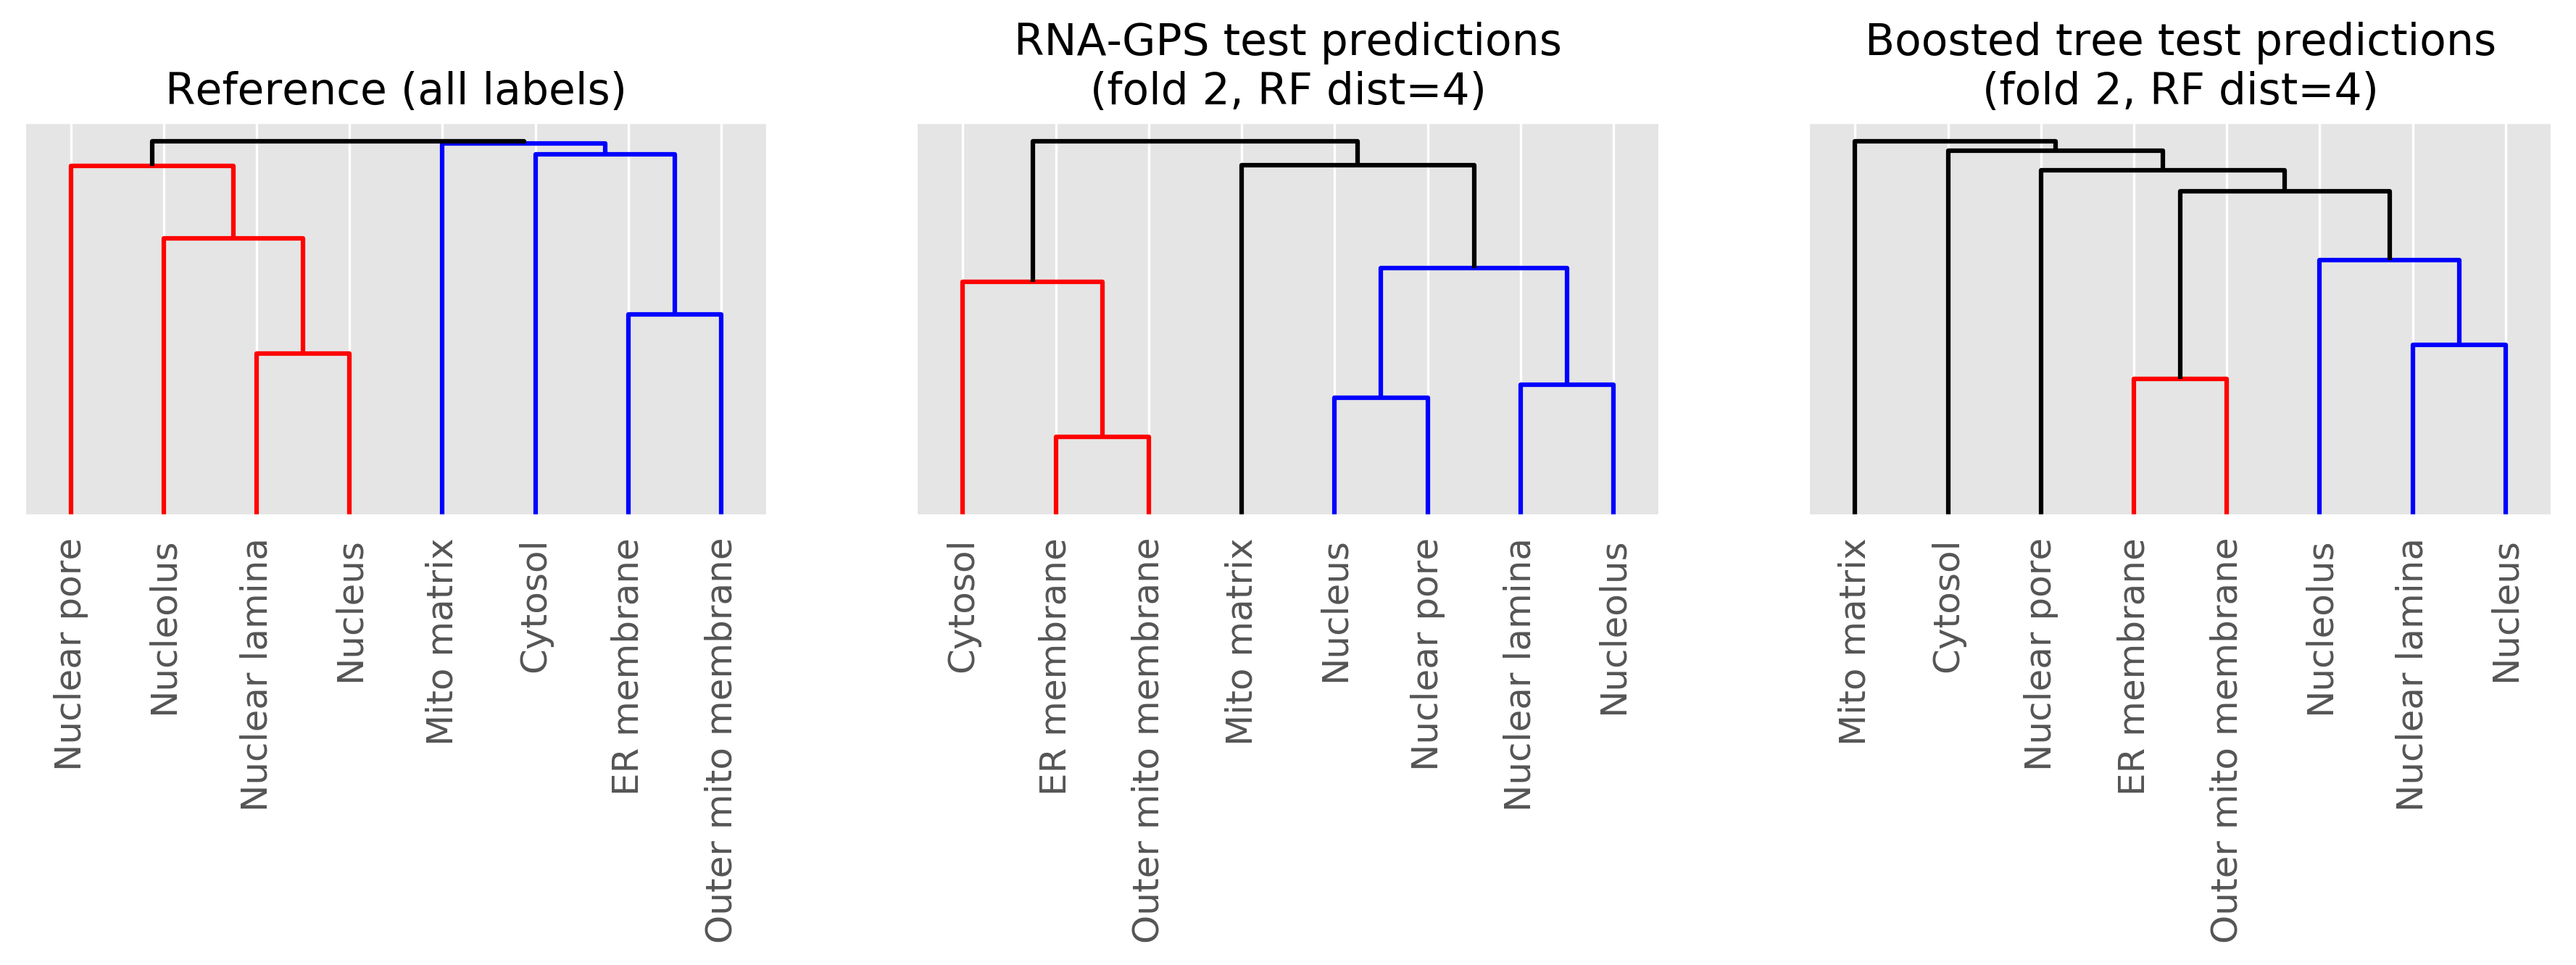

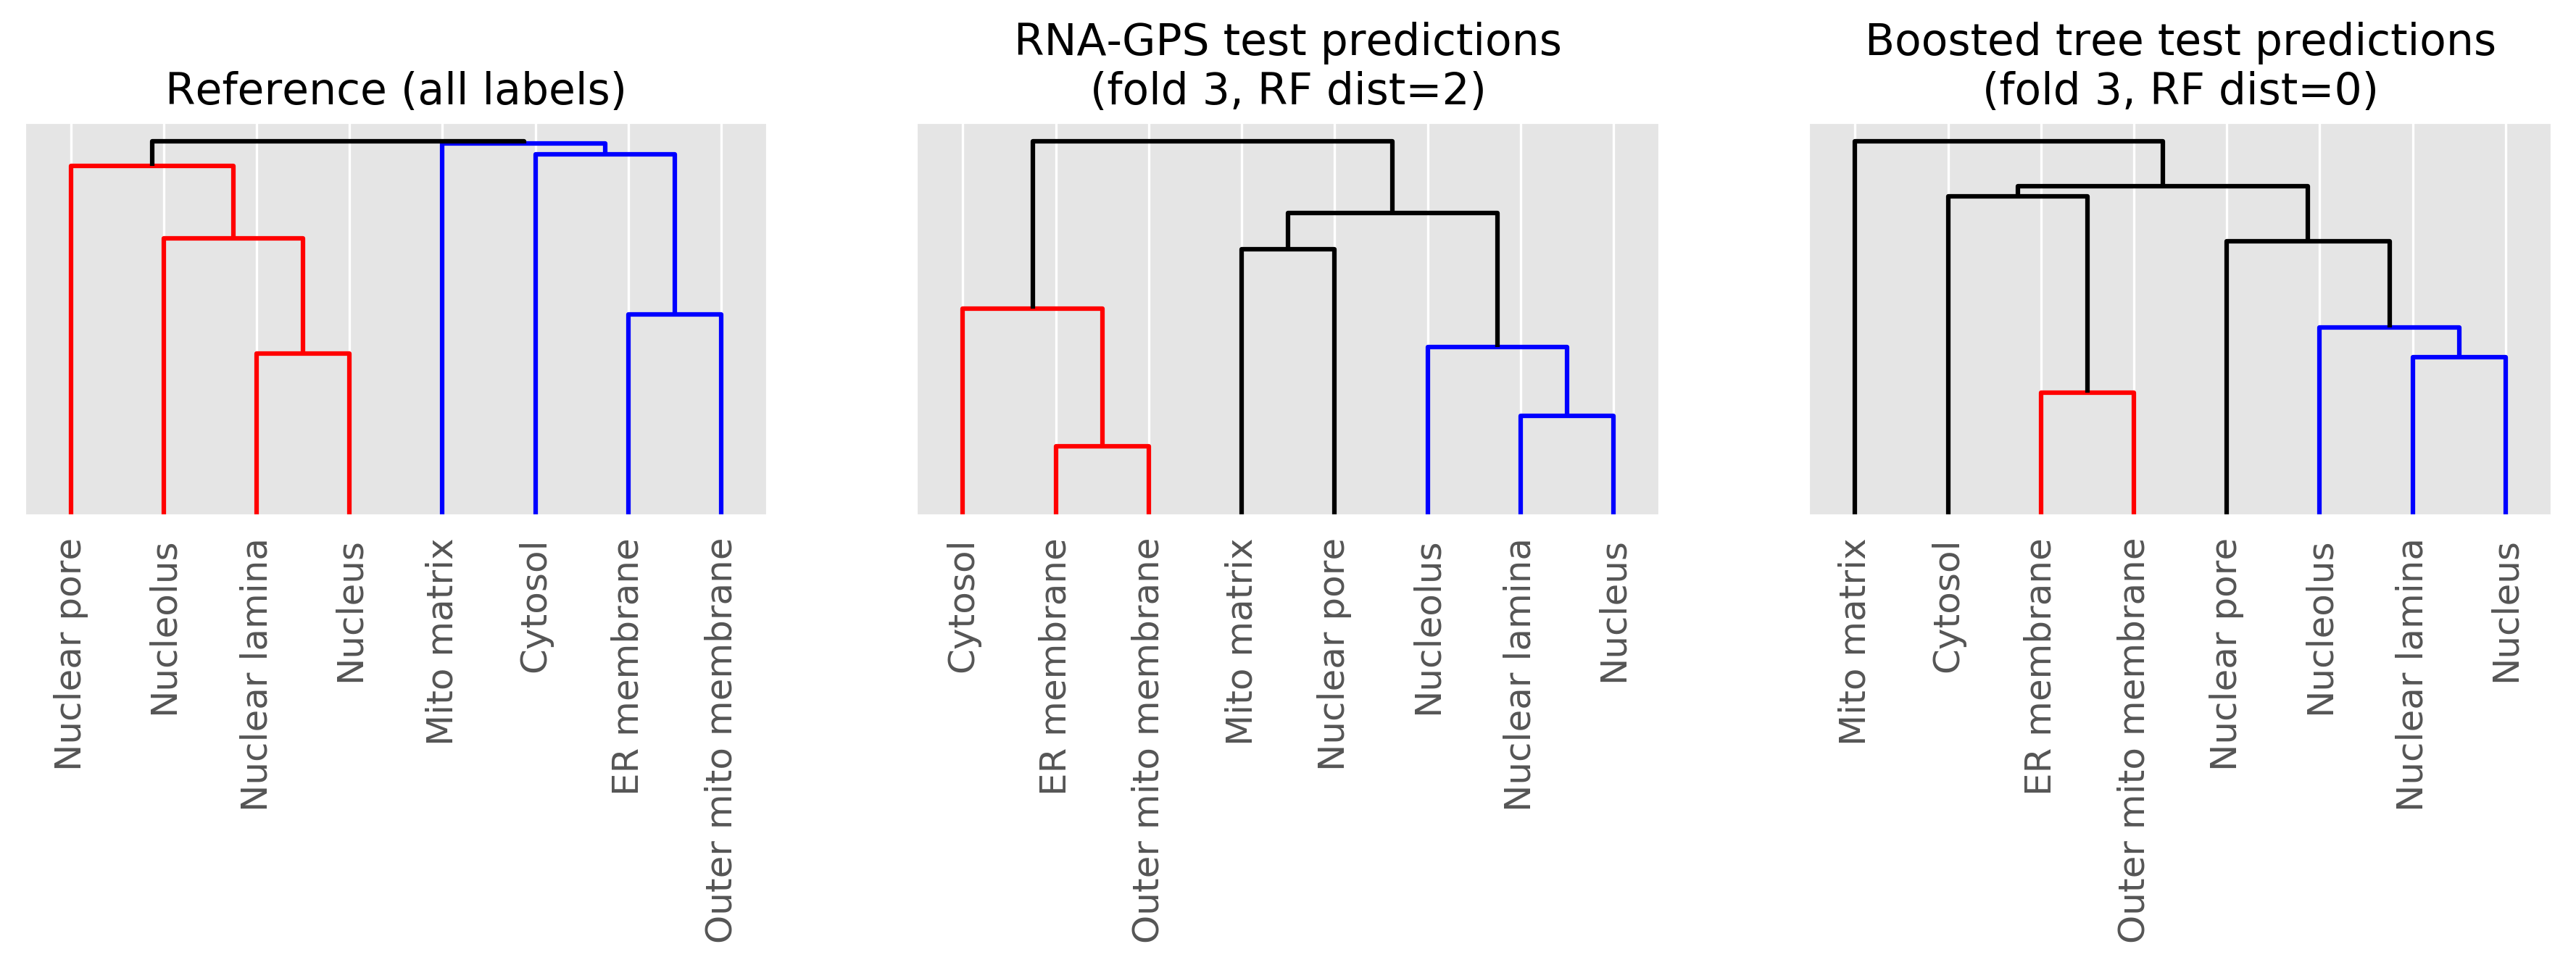

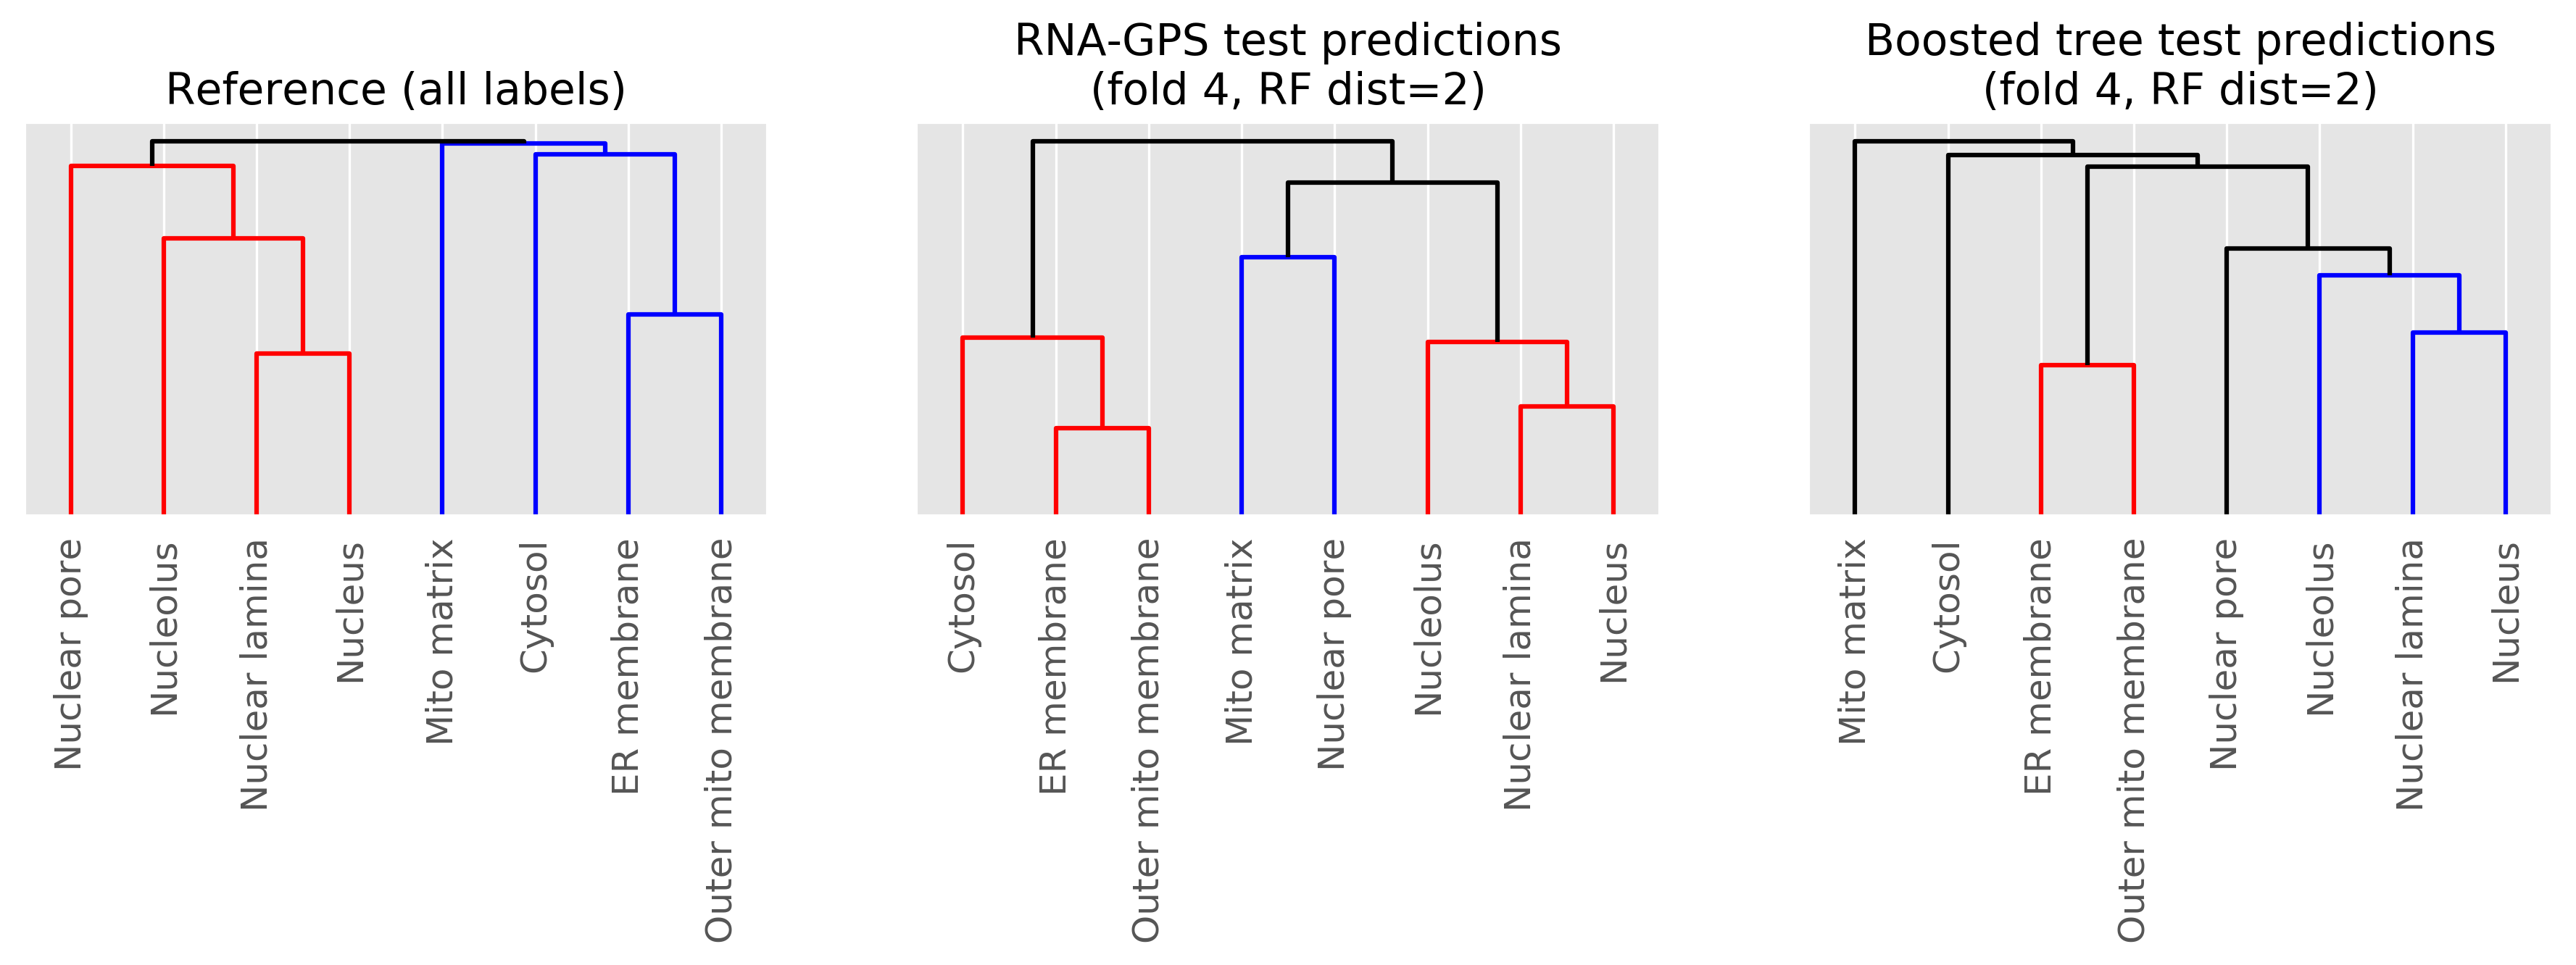

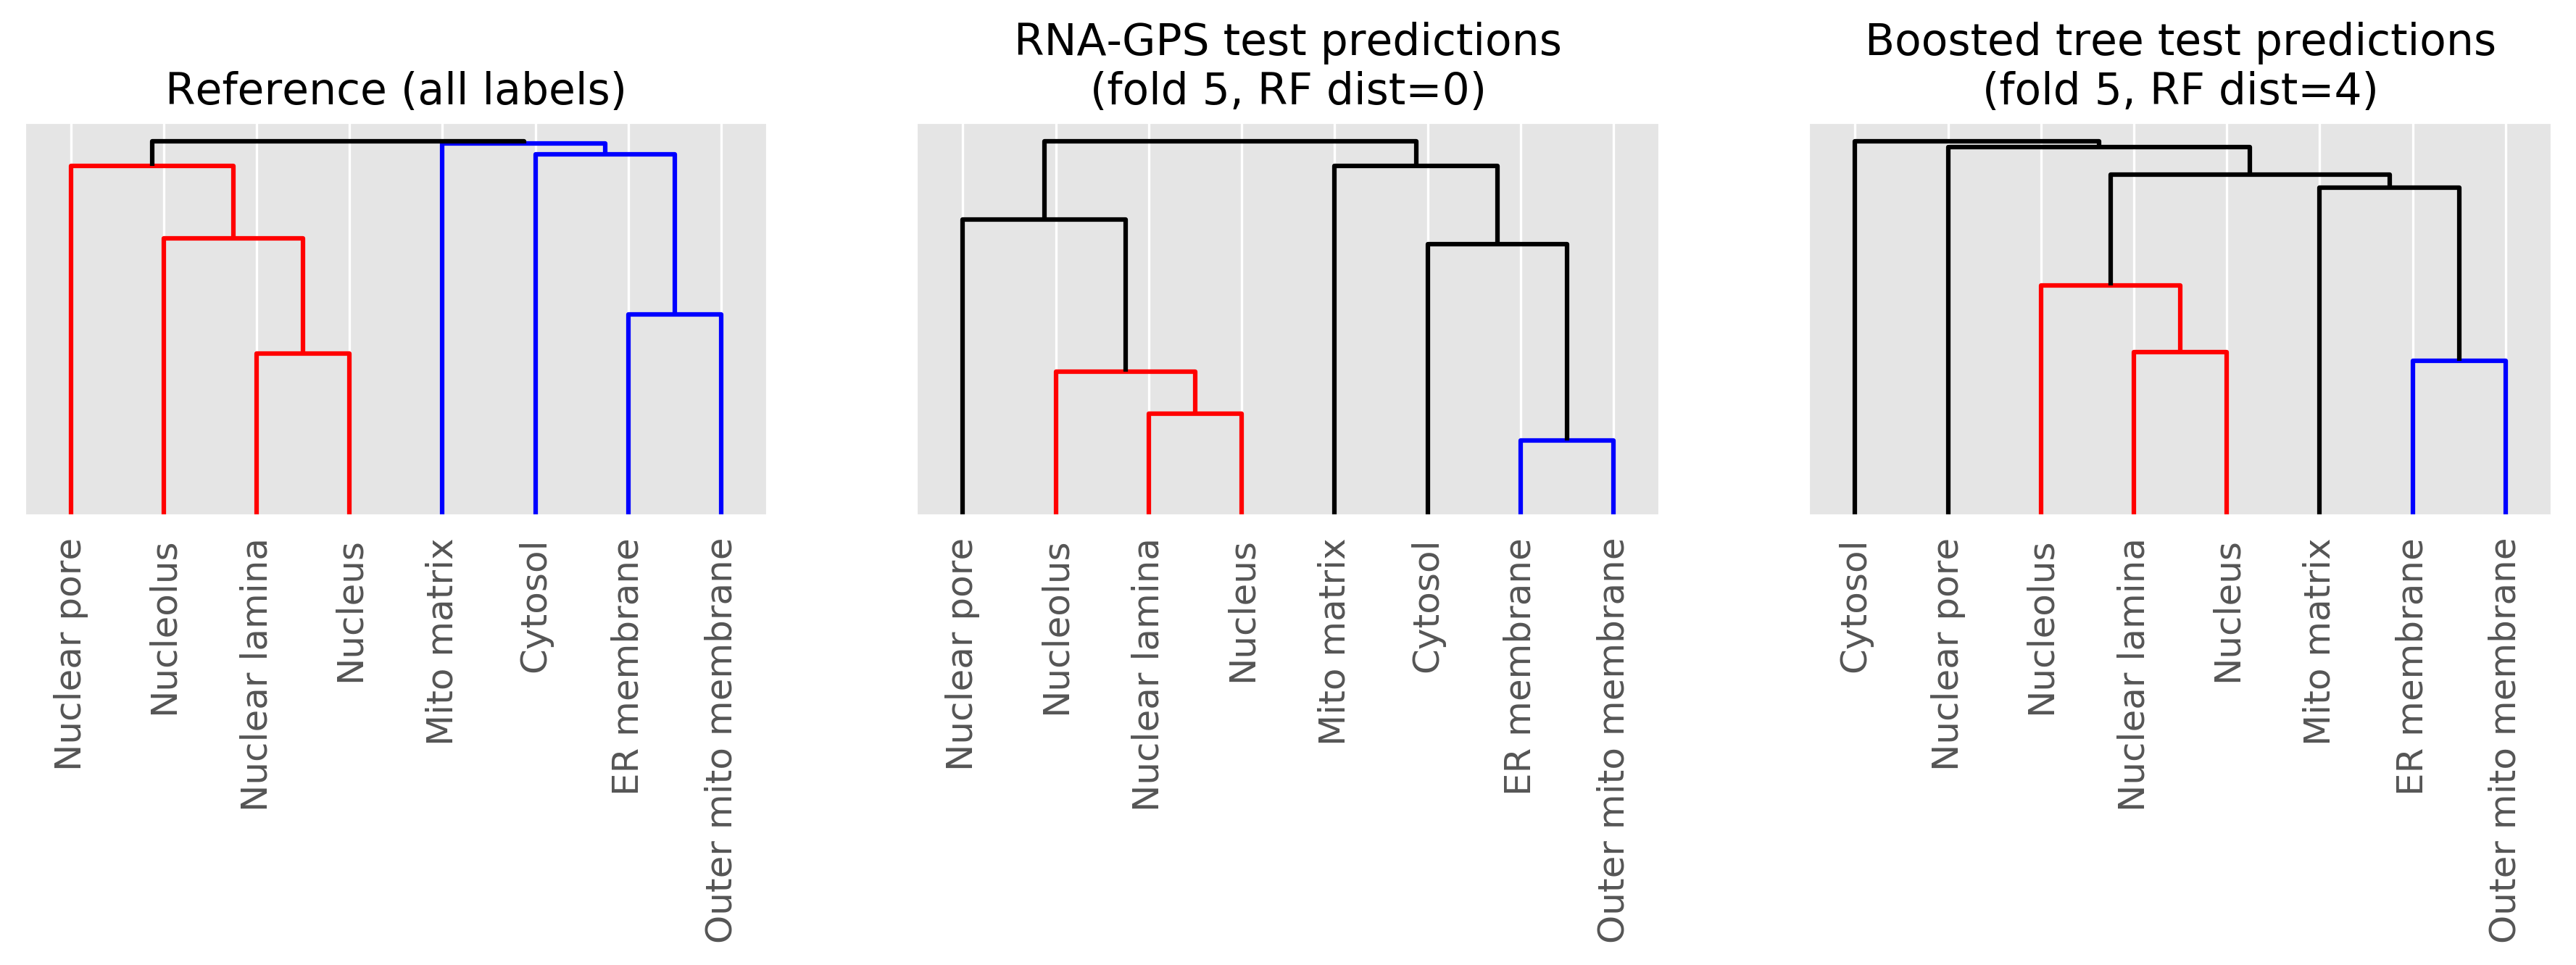

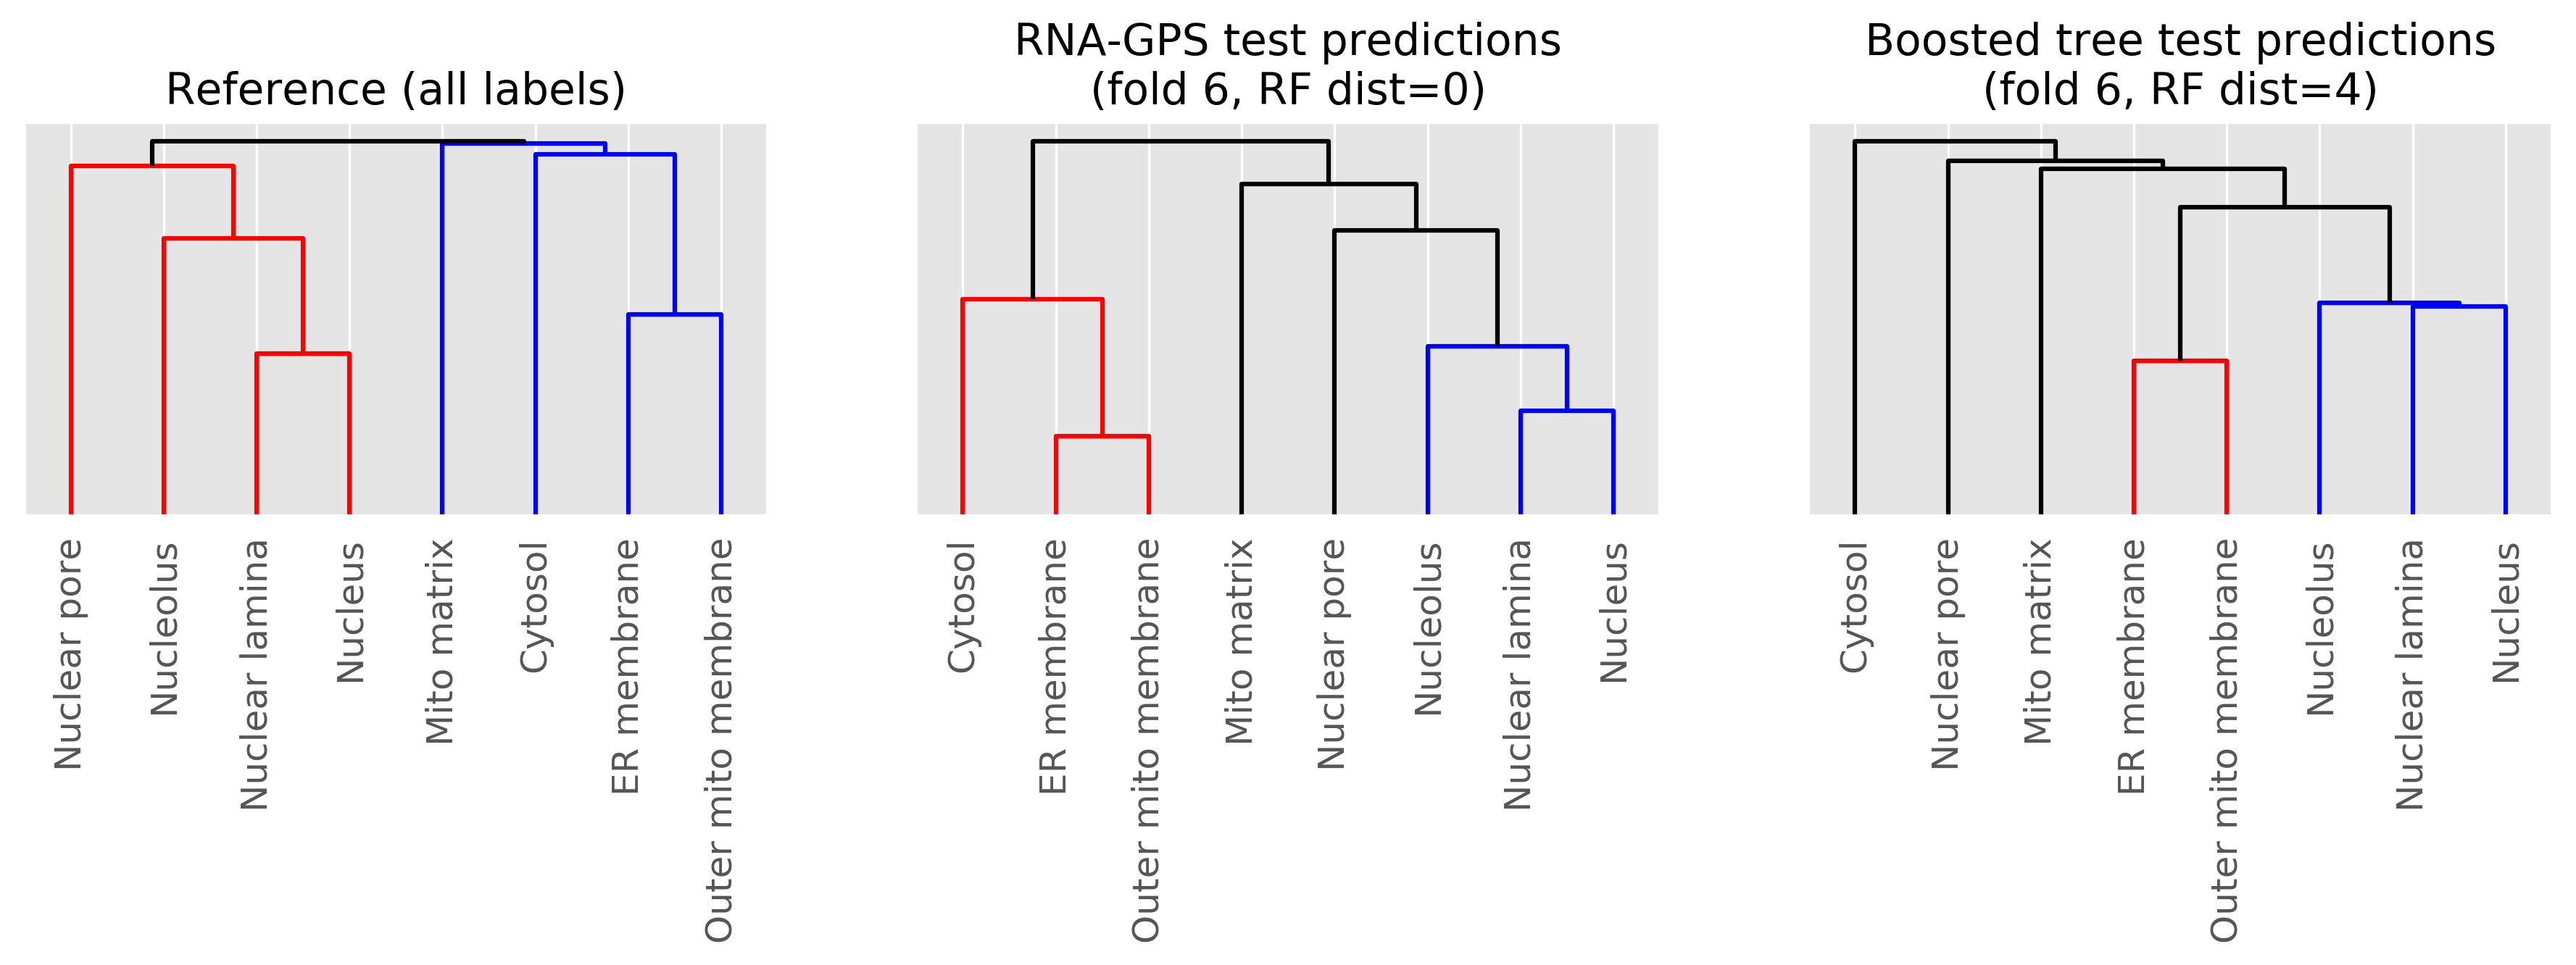

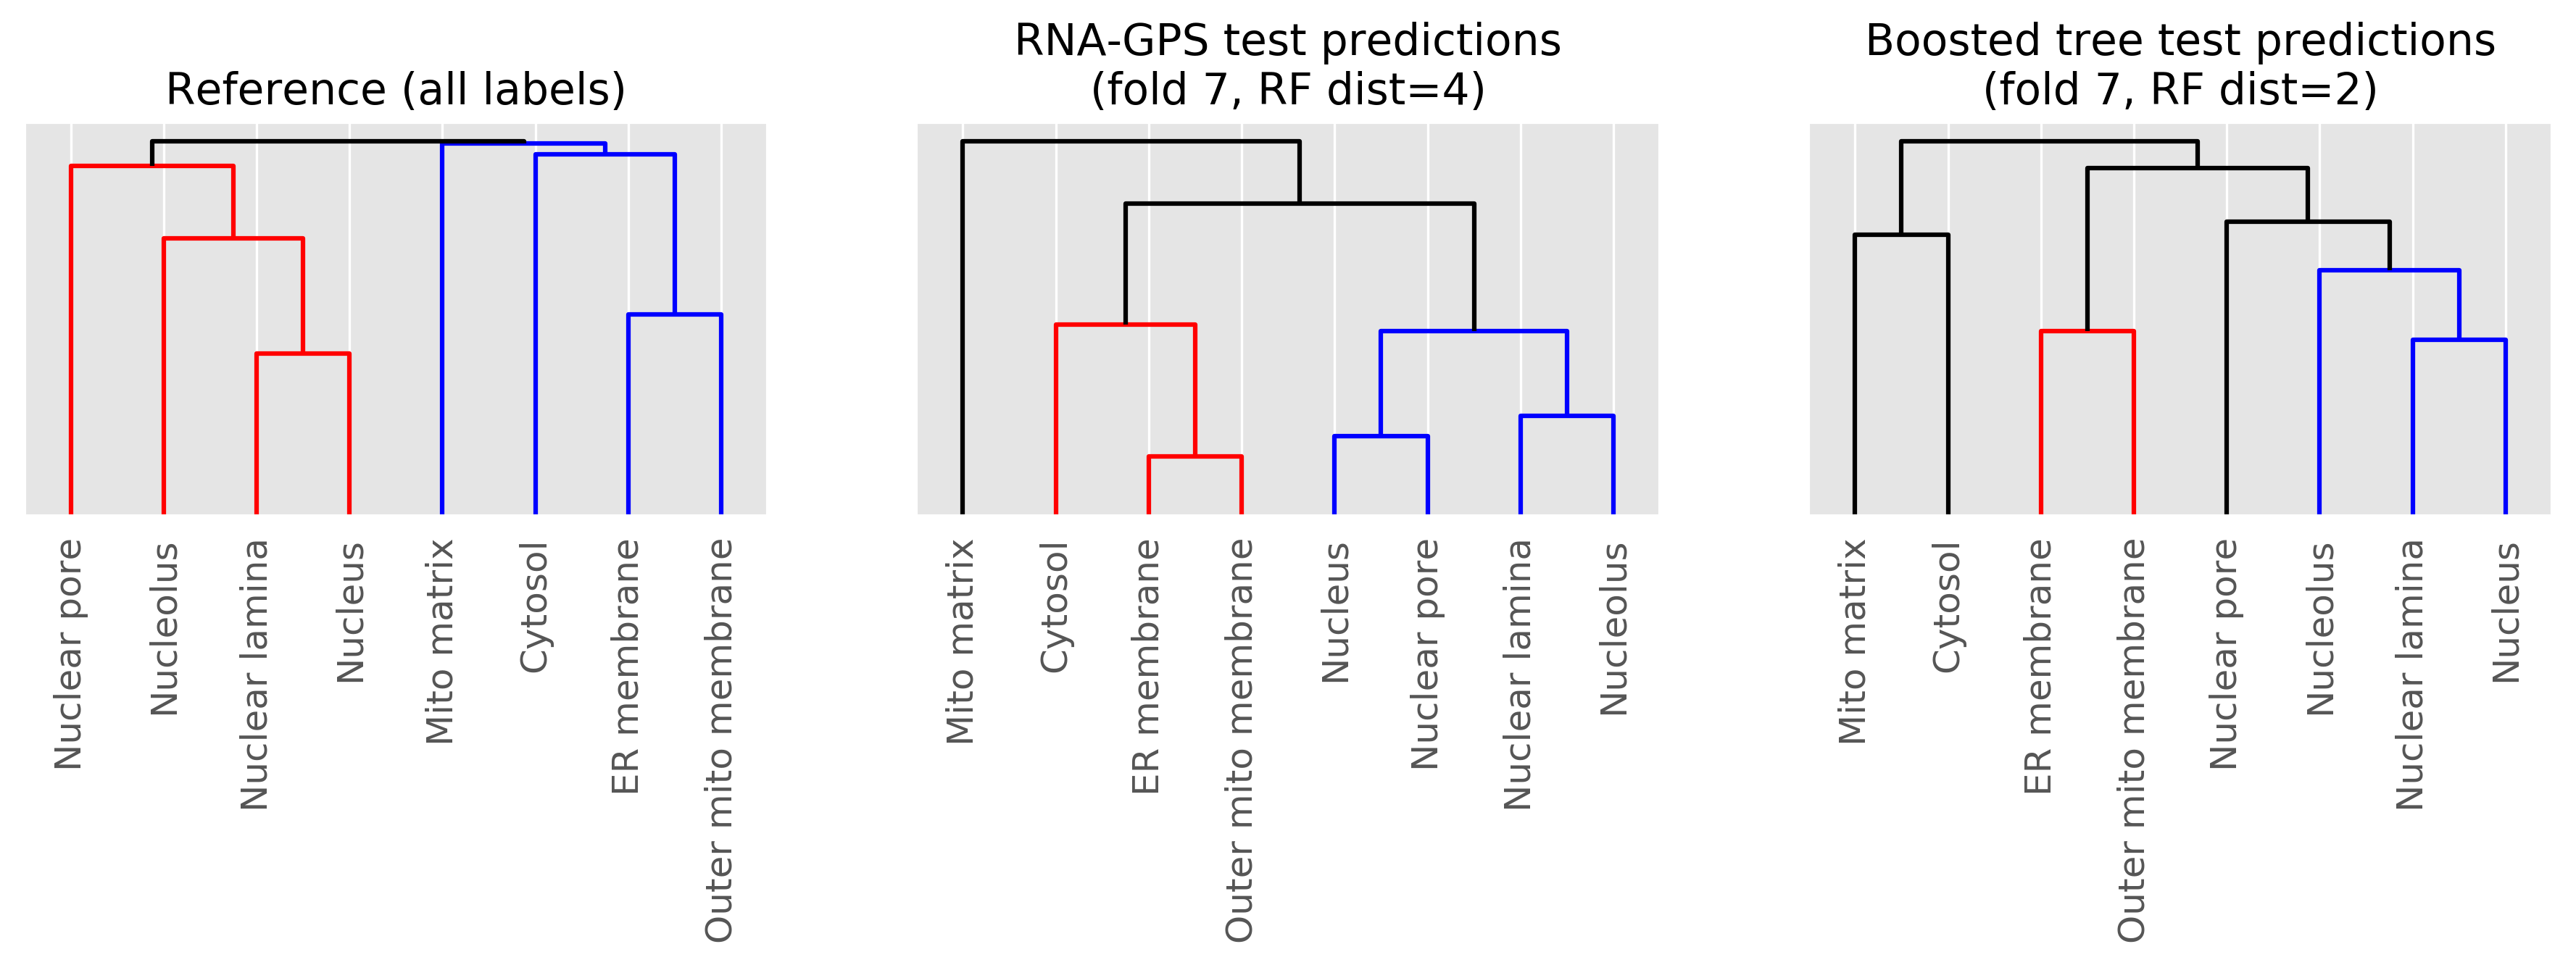

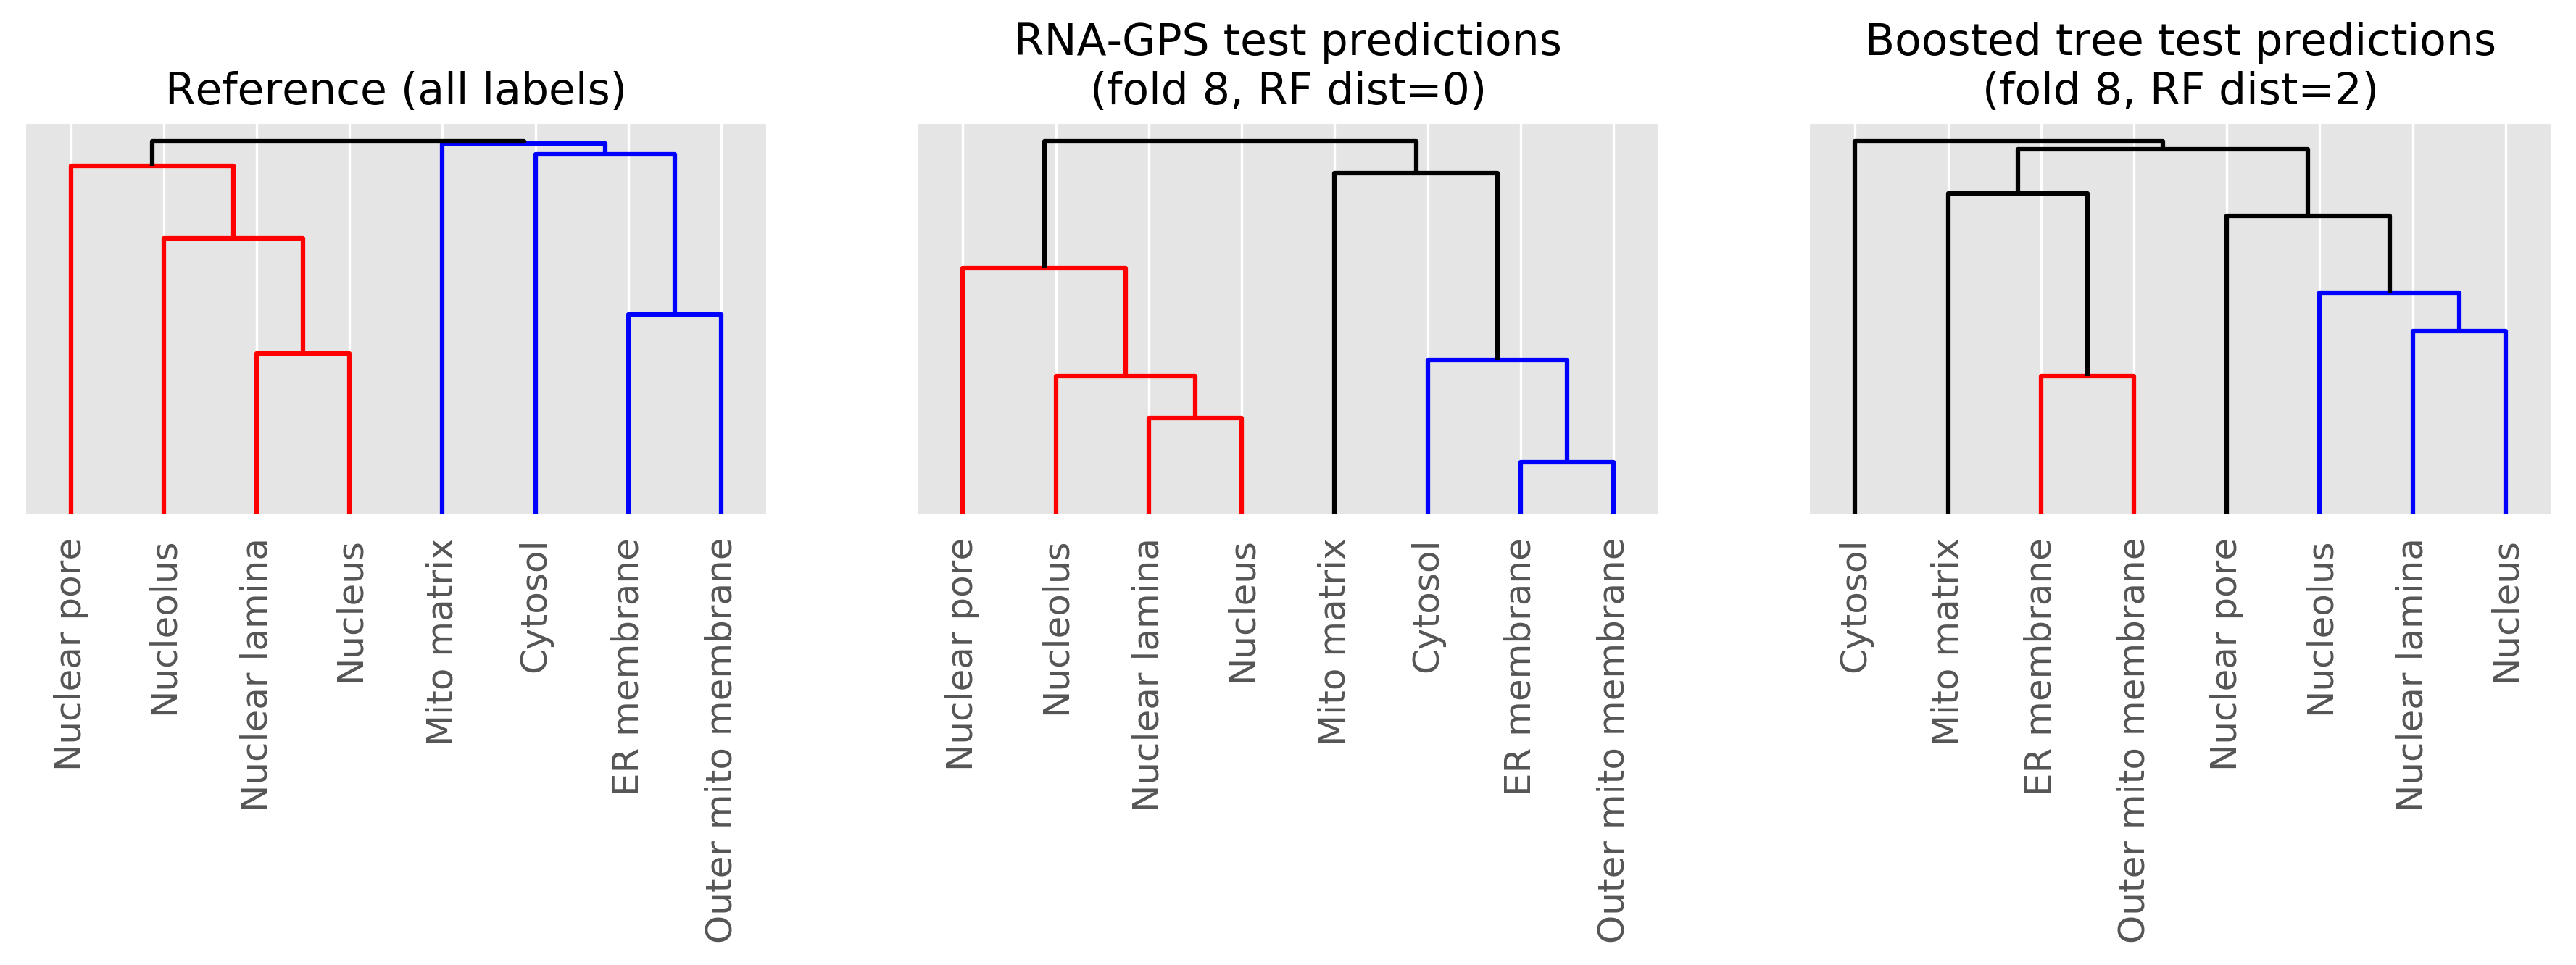

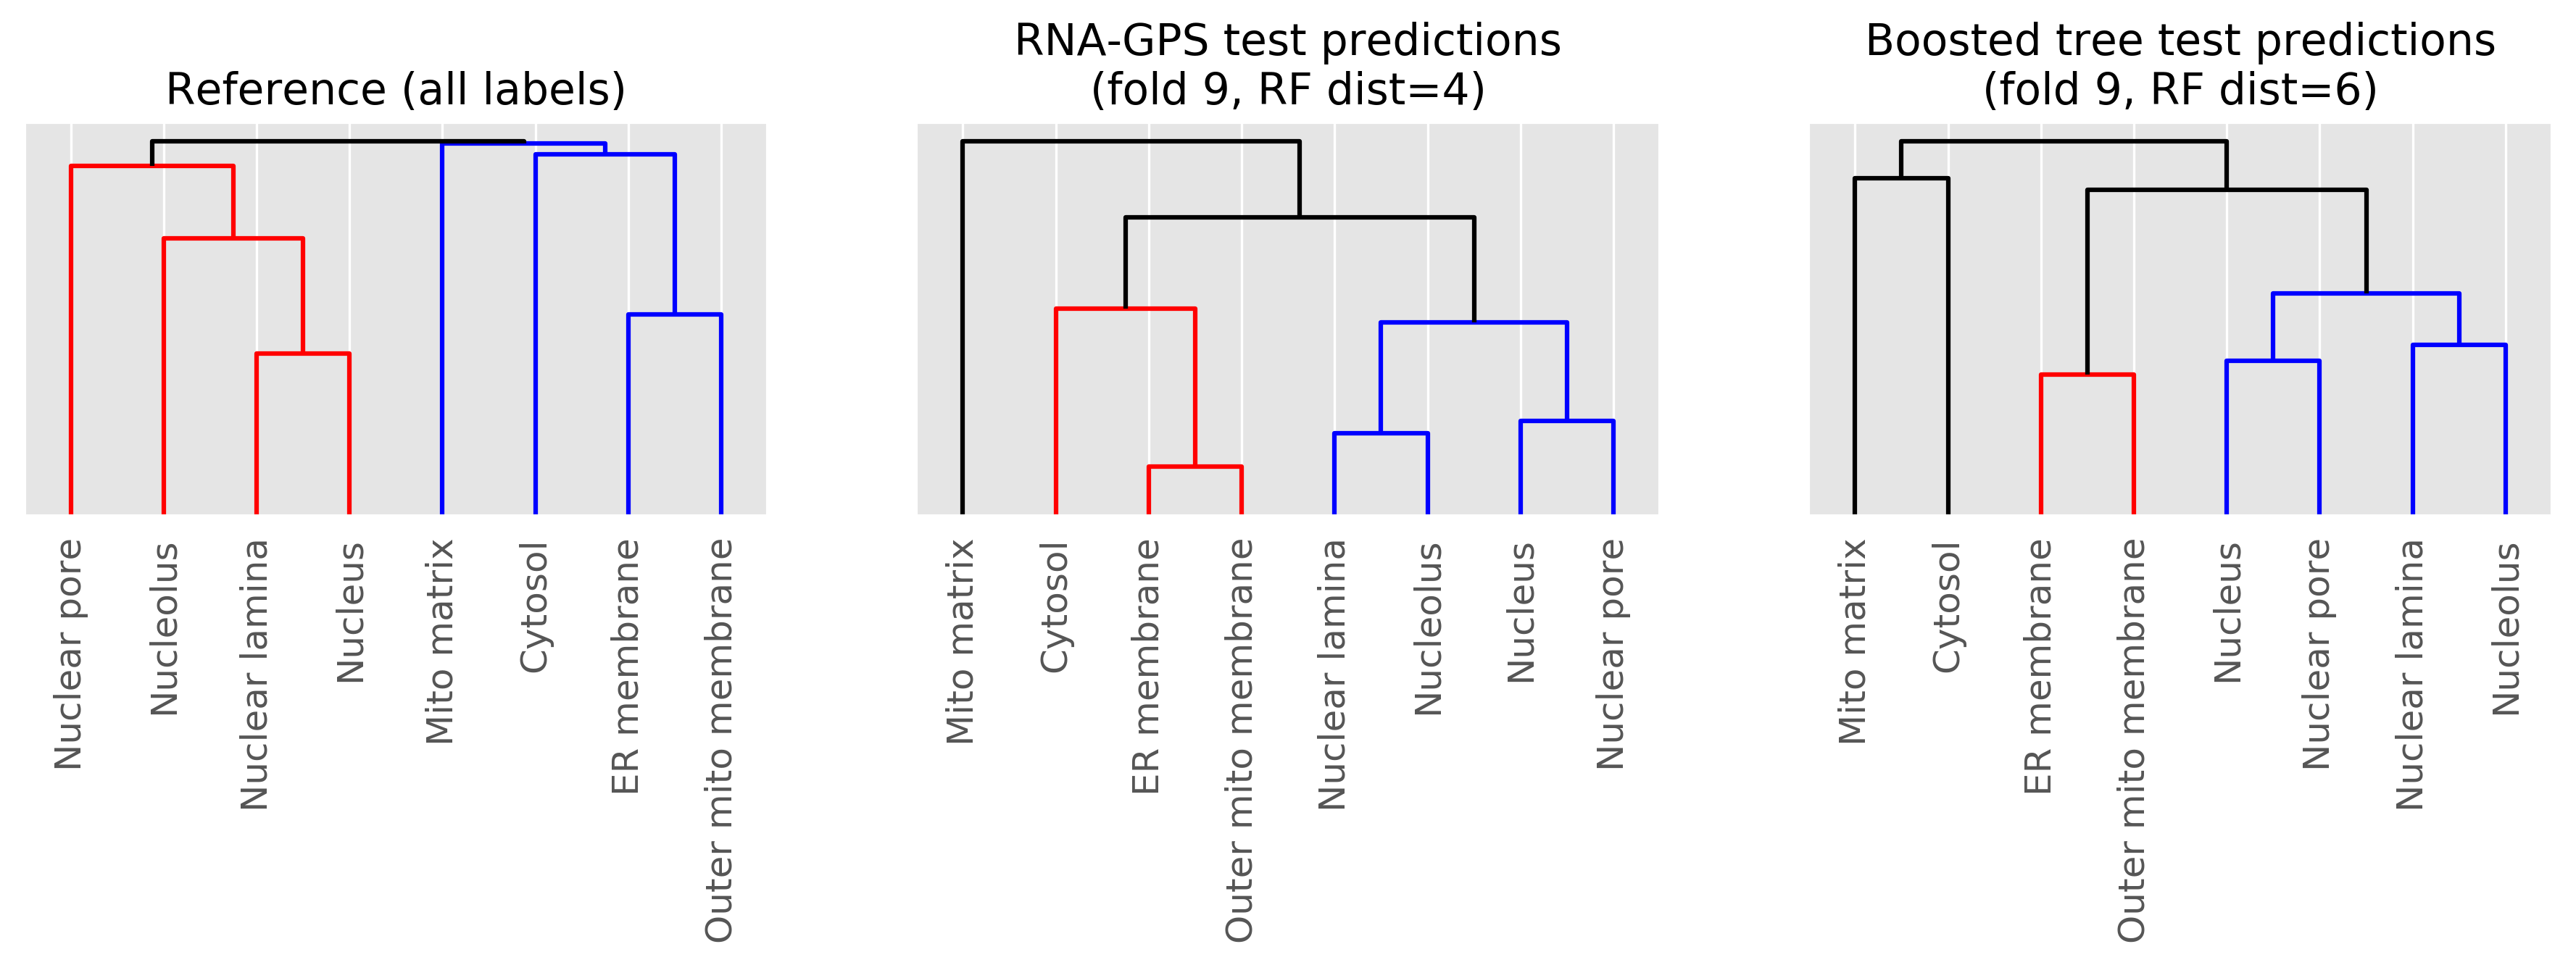

In [67]:
from scipy.cluster import hierarchy
import matplotlib.colors as mcolors

# 0.357 separates the boosted tree odd cluster out
# https://python-graph-gallery.com/401-customised-dendrogram/'
nuc_color = 'red'
cyto_color = 'blue'
all_distances = []
for i, (rf_clustering, xgb_clustering) in enumerate(zip(cv_clustering, xgb_cv_clustering)):
    # First calculate distances
    dpy_trees = []
    for g in [g_full_truths, rf_clustering, xgb_clustering]:
        t = dendropy.Tree.get(
            data=extract_clustering(g.dendrogram_col.linkage, full_dataset.compartments) + ";",
            schema='newick',
            taxon_namespace=t1.taxon_namespace,
        )
        t.encode_bipartitions()
        dpy_trees.append(t)
    # https://dendropy.org/library/treecompare.html#module-dendropy.calculate.treecompare
    dpy_dists = np.array([dendropy.calculate.treecompare.symmetric_difference(dpy_trees[0], dt) for dt in dpy_trees])
    all_distances.append(dpy_dists)

    fig, axes = plt.subplots(dpi=300, ncols=3, figsize=(15, 2.4))
    for g, label, d, thresh, ax in zip([g_full_truths, rf_clustering, xgb_clustering], ['Reference (all labels)', 'RNA-GPS test predictions', 'Boosted tree test predictions'], dpy_dists, [0.94, 0.32, 0.85], axes):
        if "Reference" not in label:
            label += f"\n(fold {i}, RF dist={d})"
        is_boosted = label == "Boosted tree predictions"
        hierarchy.set_link_color_palette([nuc_color, cyto_color])
        hierarchy.dendrogram(
            g.dendrogram_col.linkage,
            ax=ax,
            labels=[data_loader.LOCALIZATION_FULL_NAME_DICT[l] for l in full_dataset.compartments],
            leaf_rotation=90,
            count_sort="ascending",
            distance_sort="ascending",
            color_threshold=thresh if "Reference" in label else None,
            above_threshold_color='black',
        )
        ax.set(
            title=label,
            yticks=[],  # Clear y axis labels
        )
        fig.show()

all_distances = np.vstack(all_distances)

In [66]:
all_distances

array([[0, 0, 2],
       [0, 0, 6],
       [0, 4, 4],
       [0, 2, 0],
       [0, 2, 2],
       [0, 0, 4],
       [0, 0, 4],
       [0, 4, 2],
       [0, 0, 2],
       [0, 4, 6]])